In [1]:
# Подготовка
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve

import zipfile


__z = zipfile.ZipFile("dataset.zip")
#df_str = __z.open("Vehicle_policies_2020.csv").read().decode("utf-8")
df_str_fs = __z.open("car_price_prediction.csv")

df_src = pd.read_csv(df_str_fs)


# Предварительная обработка данных

Данные [отсюда](https://www.kaggle.com/datasets/deepcontractor/car-price-prediction-challenge):

~~1. ID: индификатор продажи. ~~

2. Price: цена машины (этот столбец будем предсказывать). 

3. Levy: налог. 

4. Manufacturer: производитель. 

5. Model: модель машины. 

6. Prod. year: год производства. 

7. Category: тип машины. 

8. Leather interior: есть ли кожанный салон. 

9. Fuel type: тип топлива/тип двигателя. 

10. Engine volume: рабочий объём двигателя. 

11. Mileage: пробег. 

12. Cylinders: количество цилиндров. 

13. Gear box type: тип коробки передач. 

14. Drive wheels: ведущее(ие) колес(а). 

15. Doors: двери. 

16. Wheel: расположение руля (слева или справа). 

17. Color: цвет. 

18. Airbags: количество подушек безопасности. 


In [2]:
# Look dataframe
pd.set_option('display.max_columns', df_src.shape[1])
df_src.head(300)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,45793908,4924,1282,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,183923 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
296,45763993,4704,-,OPEL,Vectra b,2000,Hatchback,No,Diesel,2.0 Turbo,11111 km,4.0,Manual,Front,04-May,Left wheel,Red,2
297,45731752,43576,1091,HYUNDAI,H1,2016,Universal,Yes,Diesel,2.5,97129 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
298,45725280,7840,-,MERCEDES-BENZ,C 200,2001,Sedan,Yes,CNG,2,140000 km,4.0,Manual,Rear,04-May,Left wheel,Black,4


In [3]:
# Look dataframe
#df_src.head()
pd.set_option('display.max_columns', df_src.shape[1])
df_src.tail(300)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
18937,45768700,941,746,TOYOTA,Prius,2009,Sedan,Yes,Hybrid,1.5,433658 km,4.0,Automatic,Front,04-May,Left wheel,White,12
18938,45809477,42538,784,HONDA,FIT,2017,Hatchback,Yes,Petrol,1.5,9000 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
18939,45794536,7300,-,BMW,318,1999,Sedan,No,Petrol,1.9,257000 km,4.0,Manual,Rear,04-May,Left wheel,Blue,6
18940,45802794,20764,642,HYUNDAI,Santa FE,2012,Jeep,Yes,Diesel,2,198966 km,4.0,Automatic,Front,04-May,Left wheel,White,4
18941,45809093,96263,866,FORD,Mustang,2015,Sedan,Yes,Petrol,2.3,43770 km,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


# Проектирование признаков

## Убираем дубликаты

In [4]:
print(f"Number of (rows, columns): {df_src.shape}")
duplicate_rows_df = df_src[df_src.duplicated()]
print(f"Number of duplicate (rows, columns): {duplicate_rows_df.shape}")
df_src = df_src.drop_duplicates()
print(f"Number of (rows, columns) after drop dublicates: {df_src.shape}")

Number of (rows, columns): (19237, 18)
Number of duplicate (rows, columns): (313, 18)
Number of (rows, columns) after drop dublicates: (18924, 18)


## Смотрим, чтобы не было нерелевантных данных

### Как поступить с такими данными?

![](./imgs/if_missing_data.png)


In [5]:
pd.set_option('display.max_rows', df_src.shape[1])
df_src.count() # Кол-во не None значений в каждой колонке

ID                  18924
Price               18924
Levy                18924
Manufacturer        18924
Model               18924
Prod. year          18924
Category            18924
Leather interior    18924
Fuel type           18924
Engine volume       18924
Mileage             18924
Cylinders           18924
Gear box type       18924
Drive wheels        18924
Doors               18924
Wheel               18924
Color               18924
Airbags             18924
dtype: int64

In [6]:
pd.set_option('display.max_rows', df_src.shape[1])
print(df_src.isnull().sum()) # Смотрим есть ли null хотя бы в каком-нибудь столбце


ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


False    13215
True      5709
Name: Levy, dtype: int64
False    0.69832
True     0.30168
Name: Levy, dtype: float64

	For example if levy exists for HONDA FIT: 218 peaces. 

	For example if levy not exists for HONDA FIT: 226 peaces. 


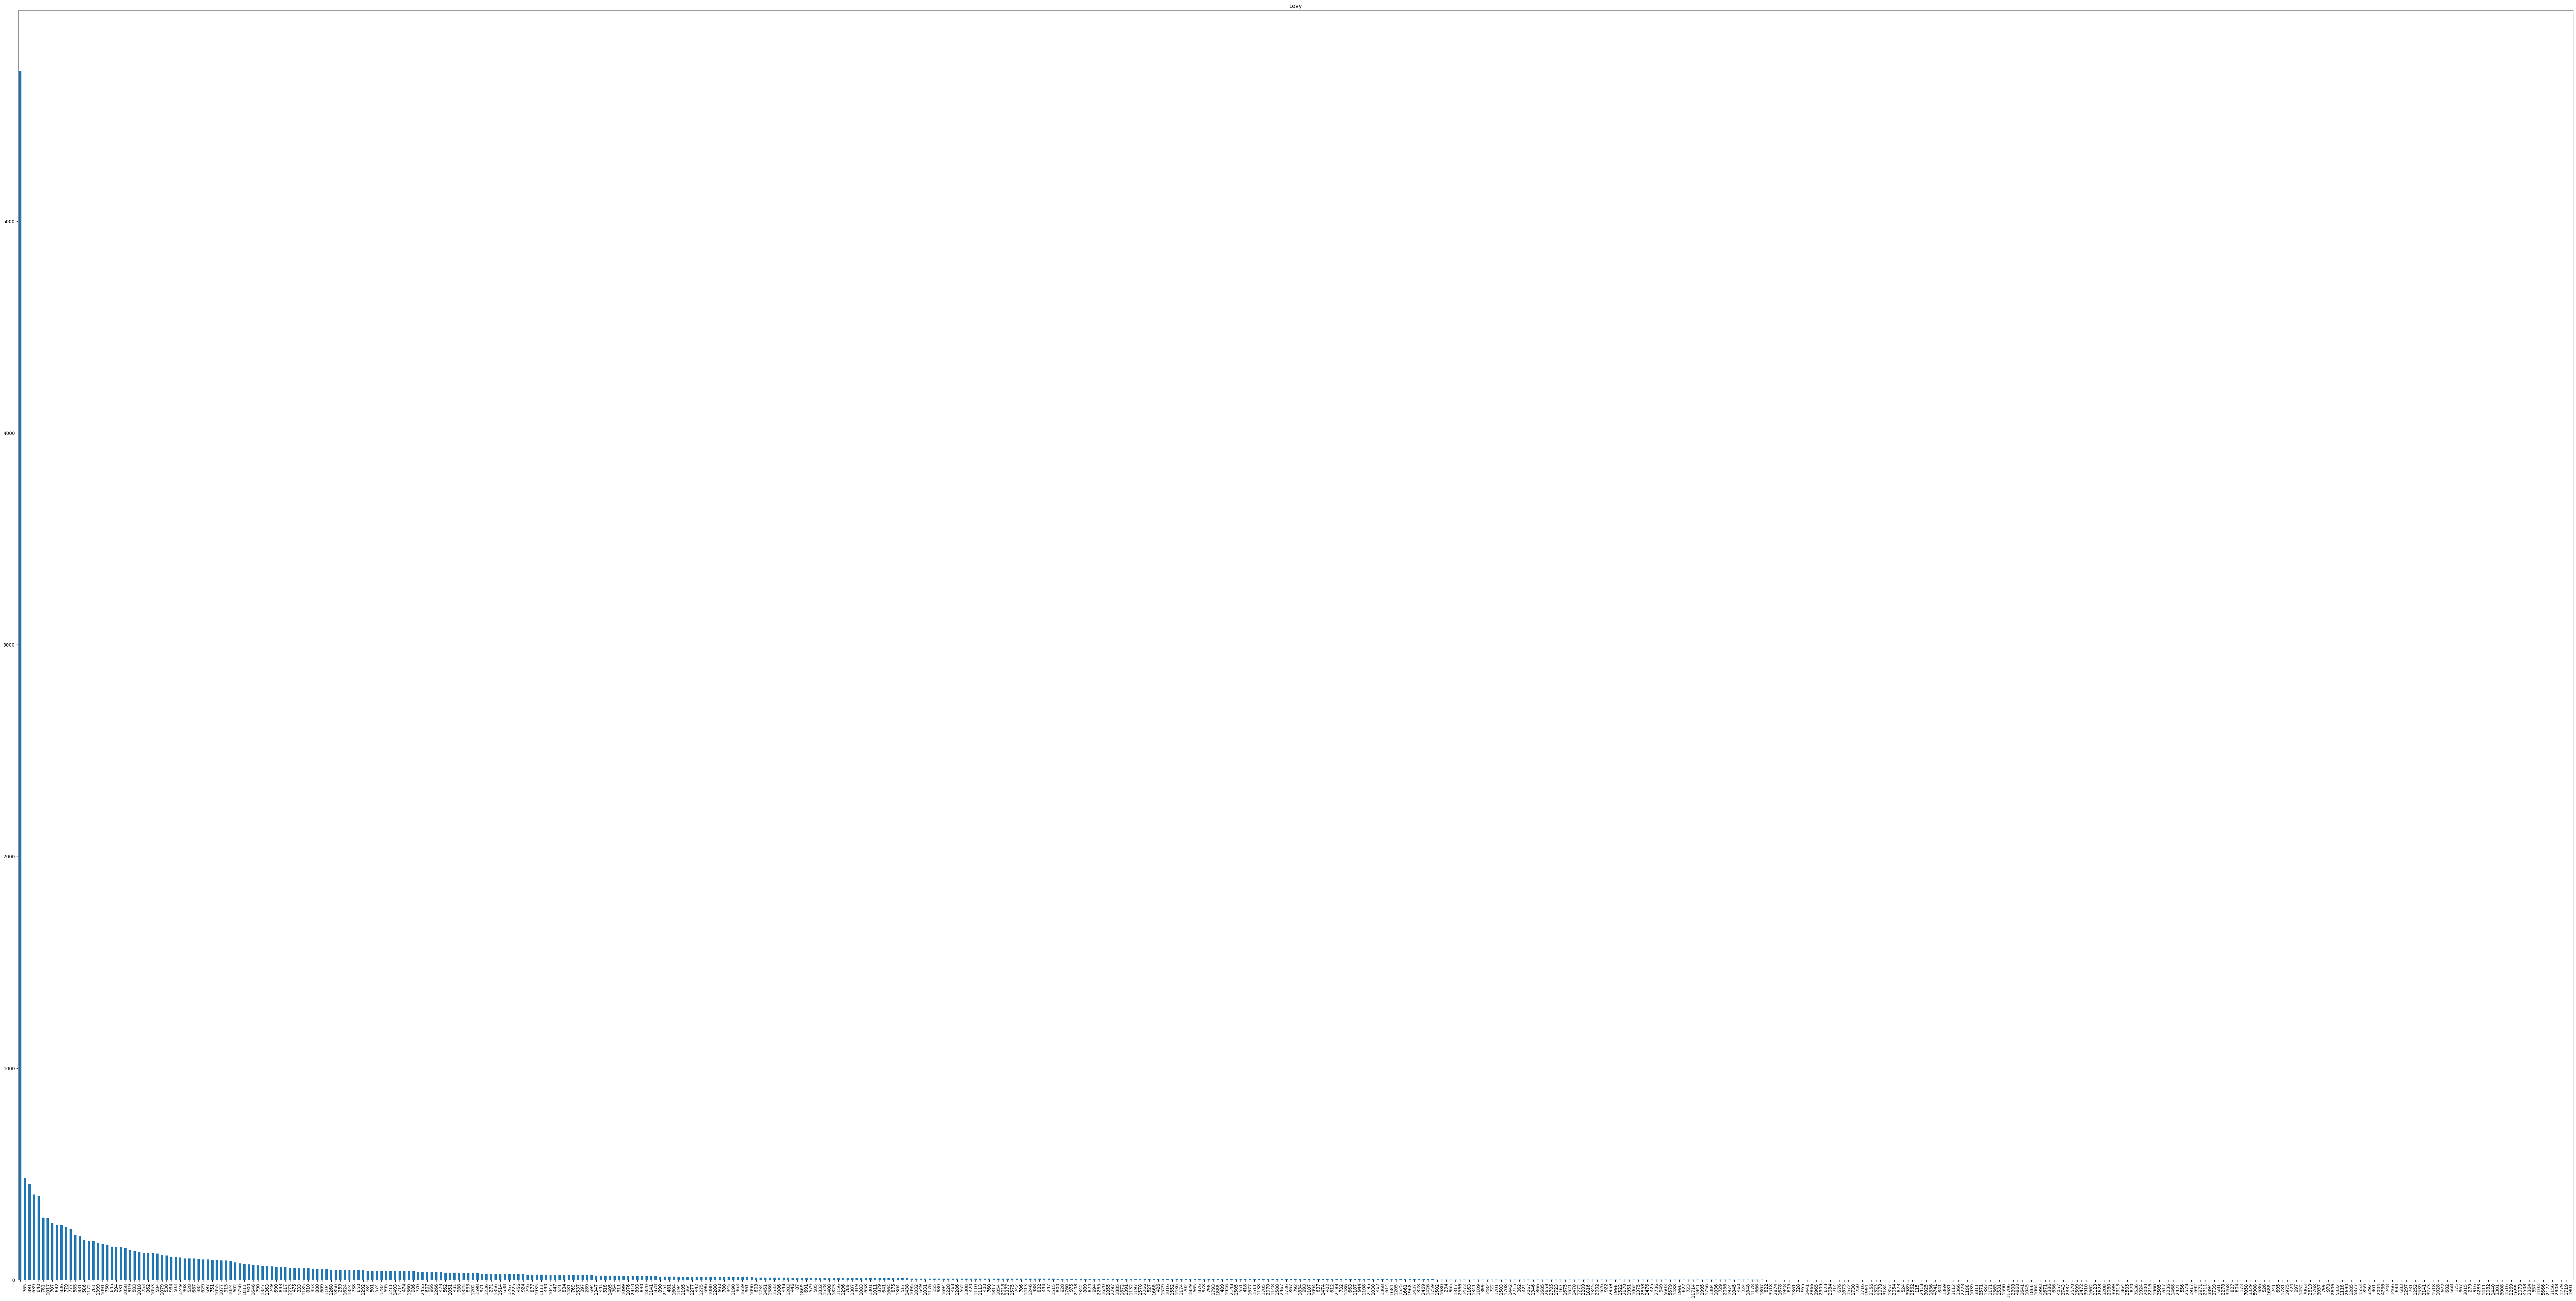

In [7]:
plt.figure(figsize=(100,50))

print((df_src["Levy"] == "-").value_counts())
print((df_src["Levy"] == "-").value_counts(normalize=True))

(df_src["Levy"]).value_counts().plot(kind='bar', subplots=True)


levy_fit_true = df_src[(df_src["Levy"] != "-") & (df_src["Model"] == "FIT") & (df_src["Manufacturer"] == "HONDA")].shape[0]

levy_fit_false = df_src[(df_src["Levy"] == "-") & (df_src["Model"] == "FIT") & (df_src["Manufacturer"] == "HONDA")].shape[0]

print(f"\n\tFor example if levy exists for HONDA FIT: {levy_fit_true} peaces. ")
print(f"\n\tFor example if levy not exists for HONDA FIT: {levy_fit_false} peaces. ")

# df_src.hist(column="Levy")

# print(f"Range of Levy: [{df_src['Levy'].min()} - {df_src['Levy'].max()}]")


In [8]:
IF_Levy_DELETE = False

if(IF_Levy_DELETE == True):
    # Удалим посностью Levy
    del df_src["Levy"]
else:
    # ИЛИ Удалим Levy, где равен "-"
    df_src = df_src.drop(df_src[df_src["Levy"] == "-"].index)


/tmp/ipykernel_43316/161341565.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_src["Price"])


<AxesSubplot: xlabel='Price', ylabel='Density'>

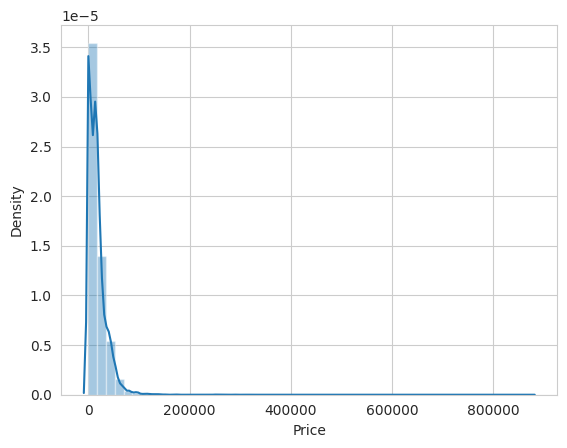

In [9]:
sns.set_style('whitegrid')
sns.distplot(df_src["Price"])

/tmp/ipykernel_43316/305833953.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(   df_src[    (df_src["Price"]<75000)&(df_src["Price"]>0)   ]["Price"]   )
/tmp/ipykernel_43316/305833953.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(   df_src[    (df_src["Price"]<30000)&(df_src["Price"]>

Range of Price: [1 - 872946]


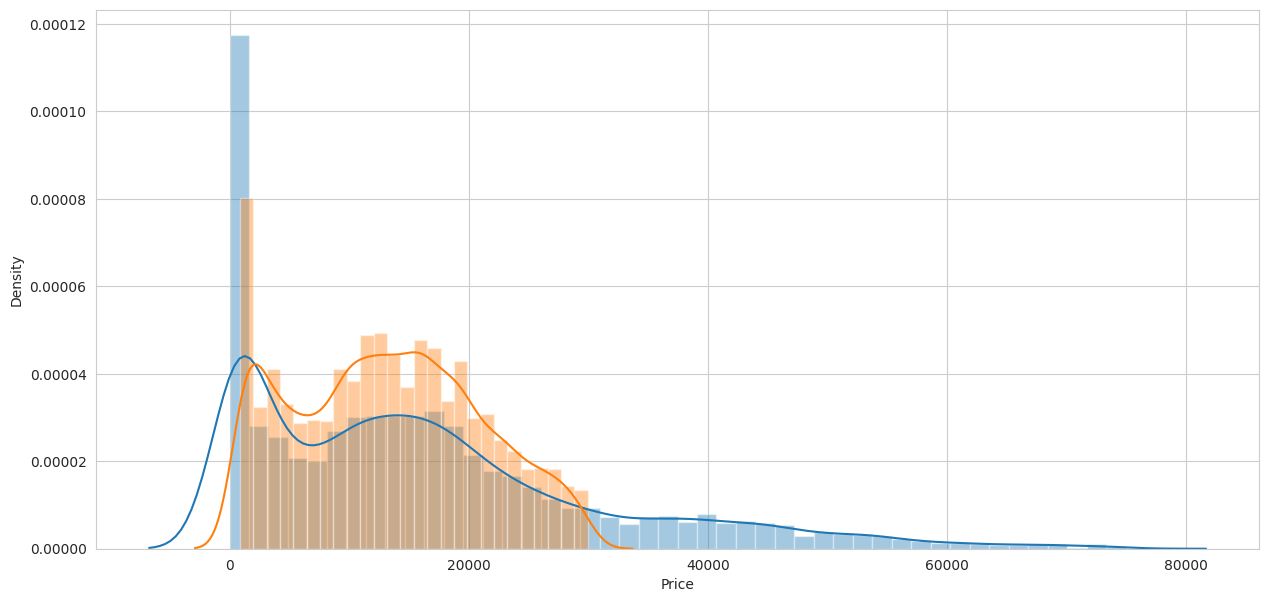

In [10]:

fig,ag = plt.subplots(figsize=(15,7))
sns.distplot(   df_src[    (df_src["Price"]<75000)&(df_src["Price"]>0)   ]["Price"]   )
sns.distplot(   df_src[    (df_src["Price"]<30000)&(df_src["Price"]>850)   ]["Price"]   )
print(f"Range of Price: [{df_src['Price'].min()} - {df_src['Price'].max()}]")

In [11]:
# Мда, создатель датасета, видимо решил приколоться...

IF_shit_DELETE = False

if(IF_shit_DELETE == True):
    # Удалим машины ниже 850 долларов
    df_src = df_src.drop(df_src[df_src["Price"] < 850].index)
else:
    # ИЛИ оставляем всё как есть и веселимся!
    pass

In [12]:
# Удалим посностью ID
del df_src["ID"]

# Удалим null'ы
df_src = df_src.dropna()

# Удалим дубликаты, если они появились после удаления столбцов
df_src = df_src.drop_duplicates()

print(f"\nNumber of (rows, columns): {df_src.shape}")

print("\nКол-во не None значений:")
print(df_src.count())

print("\nКол-во null\'ов:")
print(df_src.isnull().sum())


Number of (rows, columns): (10041, 17)

Кол-во не None значений:
Price               10041
Levy                10041
Manufacturer        10041
Model               10041
Prod. year          10041
Category            10041
Leather interior    10041
Fuel type           10041
Engine volume       10041
Mileage             10041
Cylinders           10041
Gear box type       10041
Drive wheels        10041
Doors               10041
Wheel               10041
Color               10041
Airbags             10041
dtype: int64

Кол-во null'ов:
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64


## Кодирование строк + числа - это числа

In [13]:
# Смотрим типы столбцов

pd.set_option('display.max_rows', df_src.shape[1])

nullout = '''
Должно быть:

Price                 int64
Levy                  int64
Manufacturer         cat->int
Model                cat->int
Prod. year            int64
Category             cat->int
Leather interior     cat->int
Fuel type            cat->int
Engine volume        float64
Mileage               int64
Cylinders           float64
Gear box type        cat->int
Drive wheels         cat->int
Doors                cat->int
Wheel                cat->int
Color                cat->int
Airbags               int64
'''

df_src.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [14]:
# Избавимся от мусора, сделаем числа числами

if(IF_Levy_DELETE) == False:
    print(df_src["Levy"].value_counts())
    df_src["Levy"] = df_src["Levy"].astype(int)

    print("\n==========\n")

print(df_src["Mileage"].value_counts())
df_src["Mileage"] = df_src["Mileage"].apply(lambda x: x.split(" ")[0])
df_src["Mileage"] = df_src["Mileage"].astype(int)

print("\n==========\n")

print(df_src["Engine volume"].value_counts())
df_src["Engine volume"] = df_src["Engine volume"].apply(lambda x: x.split(" ")[0])
df_src["Engine volume"] = df_src["Engine volume"].astype(float)


891     387
765     387
639     340
640     336
642     245
       ... 
2177      1
5666      1
3156      1
1719      1
1901      1
Name: Levy, Length: 558, dtype: int64


0 km         253
90000 km      45
150000 km     41
120000 km     39
110000 km     38
            ... 
380070 km      1
66630 km       1
203770 km      1
80687 km       1
186923 km      1
Name: Mileage, Length: 6734, dtype: int64


2            2728
2.5          1239
1.8           971
1.6           890
1.5           694
             ... 
2.7 Turbo       1
20              1
2.9 Turbo       1
3.4             1
3.7 Turbo       1
Name: Engine volume, Length: 87, dtype: int64


In [15]:
cat_columns = ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Wheel", "Color", "Doors"]

for col_i in cat_columns:
    print(f"\n==========\n{col_i}")
    print(df_src[col_i].value_counts())



Manufacturer
HYUNDAI          2825
TOYOTA           1820
CHEVROLET         911
FORD              587
MERCEDES-BENZ     521
                 ... 
LAMBORGHINI         1
BENTLEY             1
GAZ                 1
TESLA               1
HUMMER              1
Name: Manufacturer, Length: 49, dtype: int64

Model
Sonata          770
Elantra         647
Prius           524
Santa FE        475
Camry           459
               ... 
GLK 300           1
RAV 4 XLE         1
100 NX            1
A3 4X4            1
Prius C aqua      1
Name: Model, Length: 793, dtype: int64

Category
Sedan          4704
Jeep           3077
Hatchback      1417
Minivan         258
Coupe           223
Universal       181
Goods wagon      74
Microbus         70
Pickup           21
Cabriolet        16
Name: Category, dtype: int64

Leather interior
Yes    8134
No     1907
Name: Leather interior, dtype: int64

Fuel type
Petrol            5503
Diesel            2376
Hybrid            1636
LPG                467
Plug-in Hybr

In [16]:
df_nums = df_src.copy()

# Категориальные:

cat_columns_dummies = ["Category", "Fuel type", "Color", "Gear box type", "Drive wheels", "Doors"]
cat_columns_man = {"Leather interior": {"No": 0, "Yes": 1}, 
                   "Wheel": {"Right-hand drive": 0, "Left wheel": 1}
                  }

for col_i in cat_columns_dummies:
    #df_nums[col_i] = df_nums[col_i].astype('category')
    #df_nums[col_i] = df_nums[col_i].cat.codes
    #df_nums[col_i] = df_nums[col_i].astype(int)
    temp = pd.get_dummies(df_nums[col_i])
    df_nums = pd.concat([df_nums, temp], axis = 1)
    df_nums.drop([col_i], axis = 1, inplace = True) # inplace=False is copy, inplace=True is not copy

for col_i in cat_columns_man:
    df_nums = df_nums.replace(cat_columns_man)

pd.set_option('display.max_rows', df_nums.shape[1])
df_nums.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Model                object
Prod. year            int64
Leather interior      int64
Engine volume       float64
Mileage               int64
Cylinders           float64
Wheel                 int64
Airbags               int64
Cabriolet             uint8
Coupe                 uint8
Goods wagon           uint8
Hatchback             uint8
Jeep                  uint8
Microbus              uint8
Minivan               uint8
Pickup                uint8
Sedan                 uint8
Universal             uint8
CNG                   uint8
Diesel                uint8
Hybrid                uint8
LPG                   uint8
Petrol                uint8
Plug-in Hybrid        uint8
Beige                 uint8
Black                 uint8
Blue                  uint8
Brown                 uint8
Carnelian red         uint8
Golden                uint8
Green                 uint8
Grey                  uint8
Orange              

In [17]:
del df_nums["Manufacturer"]
del df_nums["Model"]

In [18]:
df_nums

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,...,Manual,Tiptronic,Variator,4x4,Front,Rear,02-Mar,04-May,>5
0,13328,1399,2010,1,3.5,186005,6.0,1,12,...,0,0,0,1,0,0,0,1,0
1,16621,1018,2011,0,3.0,192000,6.0,1,8,...,0,1,0,1,0,0,0,1,0
3,3607,862,2011,1,2.5,168966,4.0,1,0,...,0,0,0,1,0,0,0,1,0
4,11726,446,2014,1,1.3,91901,4.0,1,4,...,0,0,0,0,1,0,0,1,0
5,39493,891,2016,1,2.0,160931,4.0,1,4,...,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19225,8781,1107,2007,0,1.7,236000,4.0,1,4,...,1,0,0,0,1,0,0,1,0
19230,470,645,2011,1,1.8,307325,4.0,1,12,...,0,0,0,0,1,0,0,1,0
19233,15681,831,2011,1,2.4,161600,4.0,1,8,...,0,1,0,0,1,0,0,1,0
19234,26108,836,2010,1,2.0,116365,4.0,1,4,...,0,0,0,0,1,0,0,1,0


## Нормализация

In [19]:
norm_way = 1

if norm_way == 0:
    df_nums_scaled = df_nums.copy()
    buff = df_nums_scaled["Price"]
    df_nums_scaled = ( df_nums-df_nums.min() ) / ( df_nums.max() - df_nums.min() )
    del df_nums_scaled["Price"]
    df_nums_scaled.insert(0, "Price", buff)

elif norm_way == 1:
    df_nums_scaled = df_nums.copy()
    buff = df_nums_scaled["Price"]
    del df_nums_scaled["Price"]
    
    from sklearn.preprocessing import MinMaxScaler
    num_columns = ["Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Airbags"]
    if(IF_Levy_DELETE == True):
        num_columns.remove("Levy")

    scaler = MinMaxScaler()
    df_nums_scaled[num_columns] = scaler.fit_transform(df_nums_scaled[num_columns])
    
    df_nums_scaled.insert(0, "Price", buff)
df_nums_scaled.head(300)

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Wheel,Airbags,...,Manual,Tiptronic,Variator,4x4,Front,Rear,02-Mar,04-May,>5
0,13328,0.112841,0.818182,1,0.175,0.000087,0.333333,1,0.75,...,0,0,0,1,0,0,0,1,0
1,16621,0.080072,0.836364,0,0.150,0.000089,0.333333,1,0.50,...,0,1,0,1,0,0,0,1,0
3,3607,0.066655,0.836364,1,0.125,0.000079,0.200000,1,0.00,...,0,0,0,1,0,0,0,1,0
4,11726,0.030876,0.890909,1,0.065,0.000043,0.200000,1,0.25,...,0,0,0,0,1,0,0,1,0
5,39493,0.069149,0.927273,1,0.100,0.000075,0.200000,1,0.25,...,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,21169,0.059689,0.963636,0,0.070,0.000012,0.200000,1,0.50,...,0,0,0,0,1,0,0,1,0
417,7495,0.086265,0.781818,1,0.100,0.000033,0.200000,1,0.25,...,0,0,0,0,1,0,0,1,0
418,4861,0.047992,0.836364,1,0.090,0.000045,0.200000,1,0.75,...,0,0,0,0,1,0,0,1,0
419,13485,0.058313,0.909091,1,0.100,0.000034,0.200000,1,0.25,...,0,0,0,0,1,0,0,1,0


# Графики

![](./imgs/which_visualization.png)


In [20]:
num_columns = ["Price", "Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Airbags"]
for col_i in num_columns:
    if(IF_Levy_DELETE == True and col_i == "Levy"):
        continue
    print(f"Range of {col_i}: [{df_nums[col_i].min()} - {df_nums[col_i].max()}]")

Range of Price: [1 - 872946]
Range of Levy: [87 - 11714]
Range of Prod. year: [1965 - 2020]
Range of Engine volume: [0.0 - 20.0]
Range of Mileage: [0 - 2147483647]
Range of Cylinders: [1.0 - 16.0]
Range of Airbags: [0 - 16]


,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Airbags
Price,1.000000,0.081075,0.300160,0.106181,-0.004809,0.068014,-0.164185
Levy,0.081075,1.000000,-0.226092,0.579051,0.027984,0.496426,0.083863
Prod. year,0.300160,-0.226092,1.000000,-0.065427,-0.054543,-0.098084,0.087603
Engine volume,0.106181,0.579051,-0.065427,1.000000,0.001080,0.720580,0.254506
Mileage,-0.004809,0.027984,-0.054543,0.001080,1.000000,-0.004450,-0.013911
Cylinders,0.068014,0.496426,-0.098084,0.720580,-0.004450,1.000000,0.249078
Airbags,-0.164185,0.083863,0.087603,0.254506,-0.013911,0.249078,1.000000


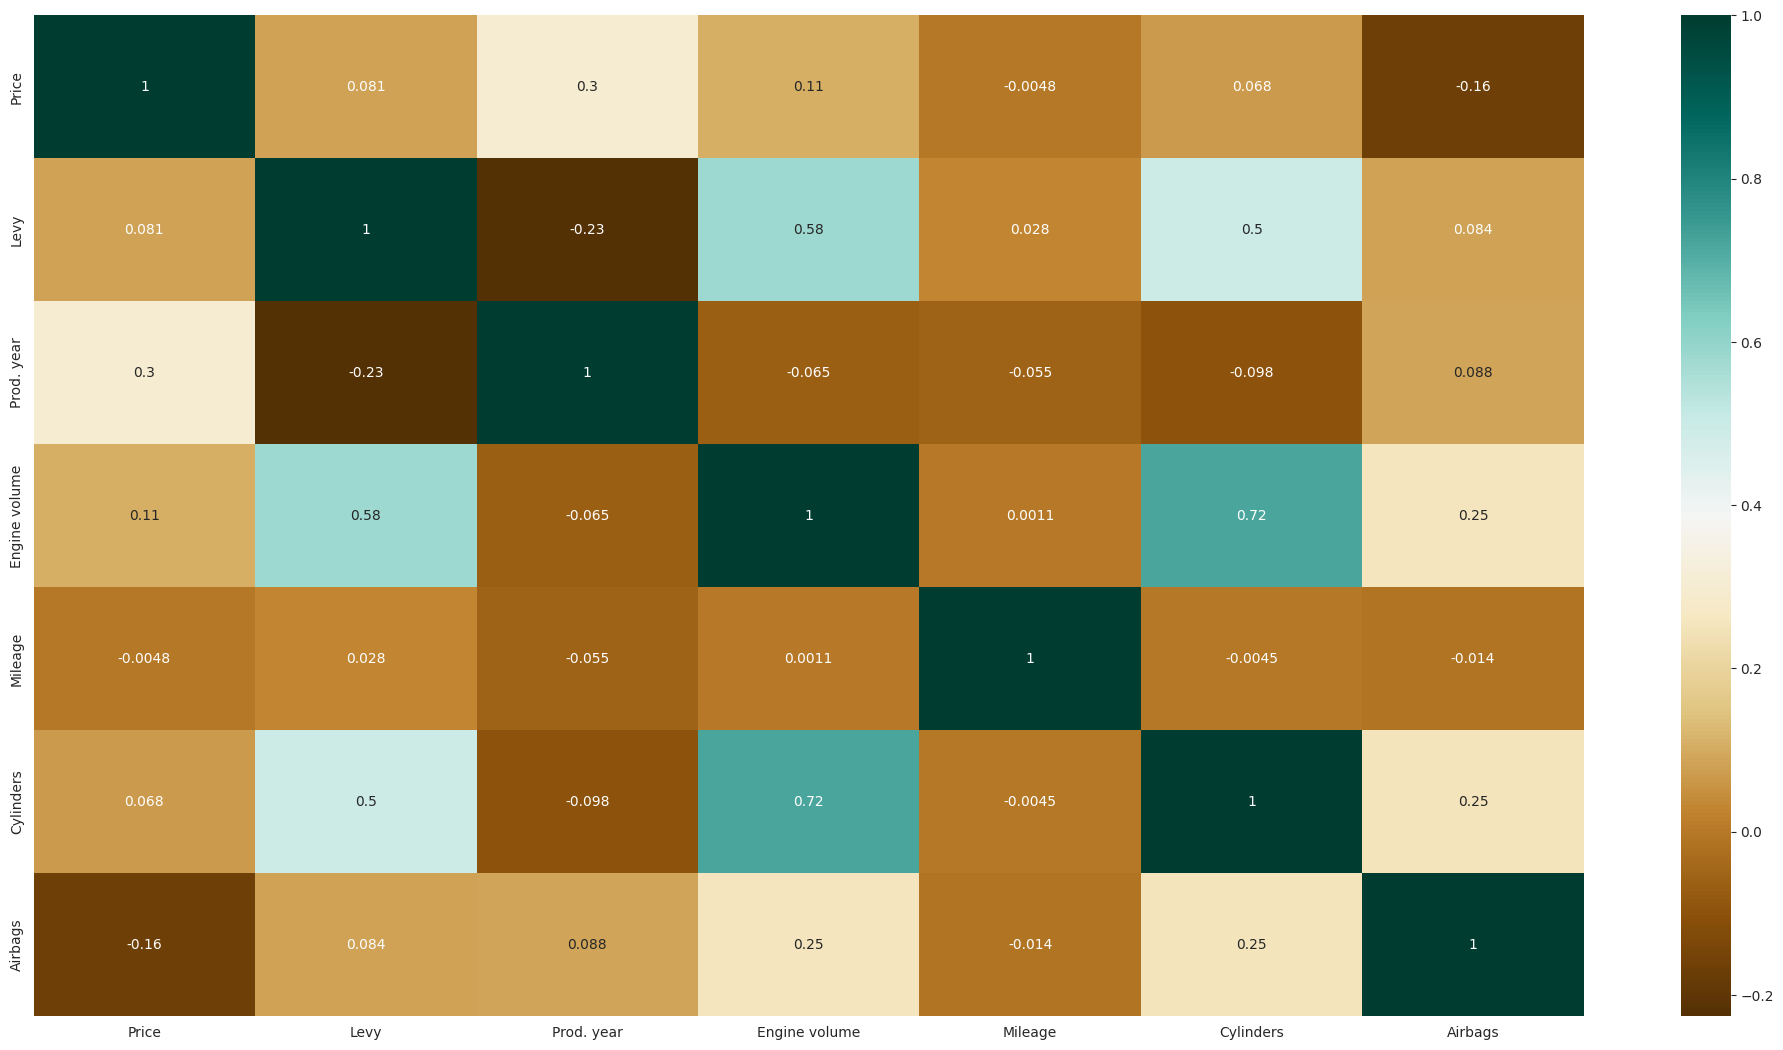

In [21]:
# Тепловая карта

num_columns = ["Price", "Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Airbags"]

if(IF_Levy_DELETE == True):
    num_columns.remove("Levy")

plt.figure(figsize=(25, 13))
c= df_nums[num_columns].corr()
sns.heatmap(c, cmap="BrBG", annot=True)
c

# Смотря на карту эту, невольно спрашиваешь: А почему предсказываем Price? Куда интереснее выглядит Levy

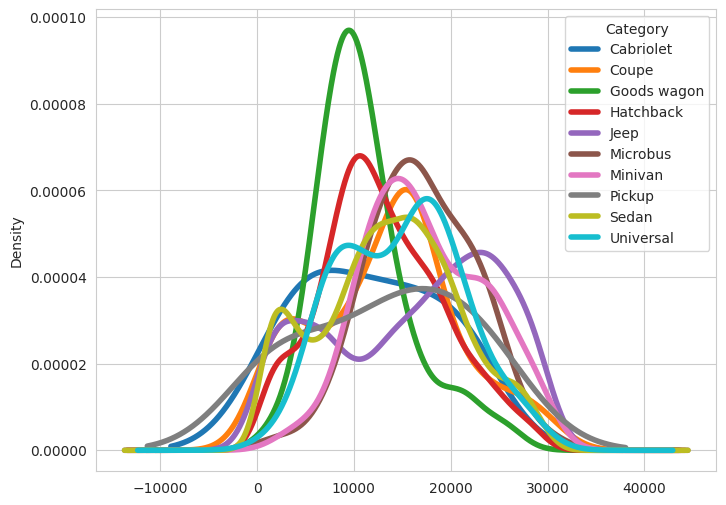

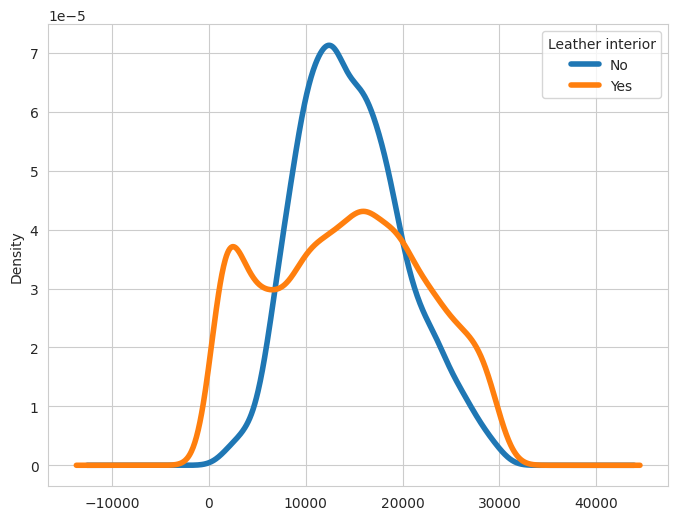

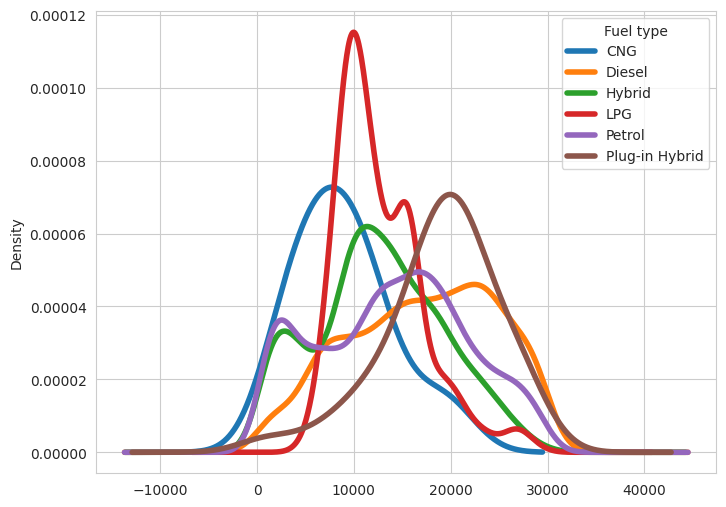

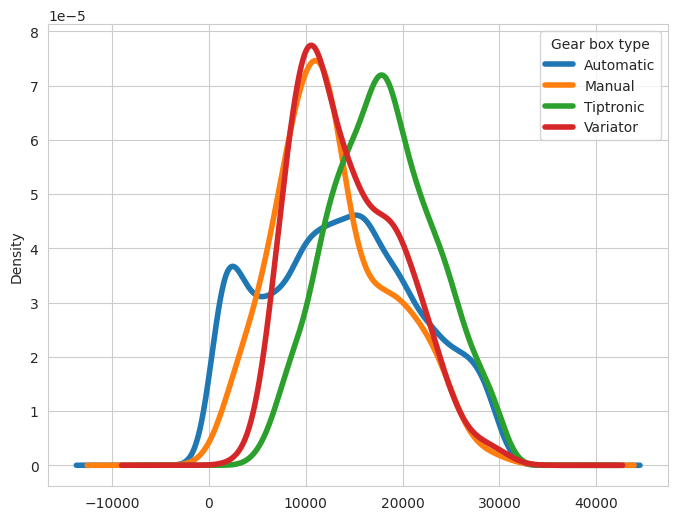

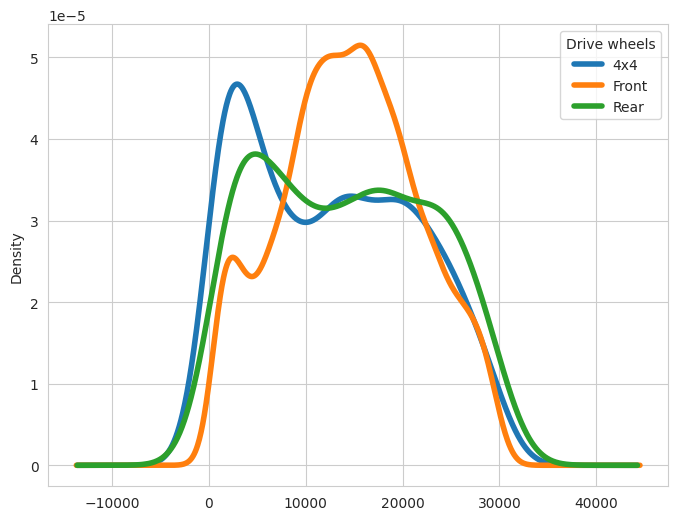

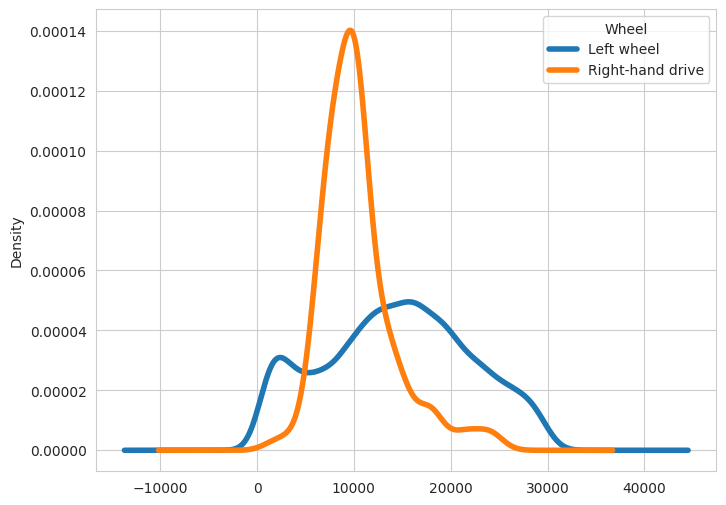

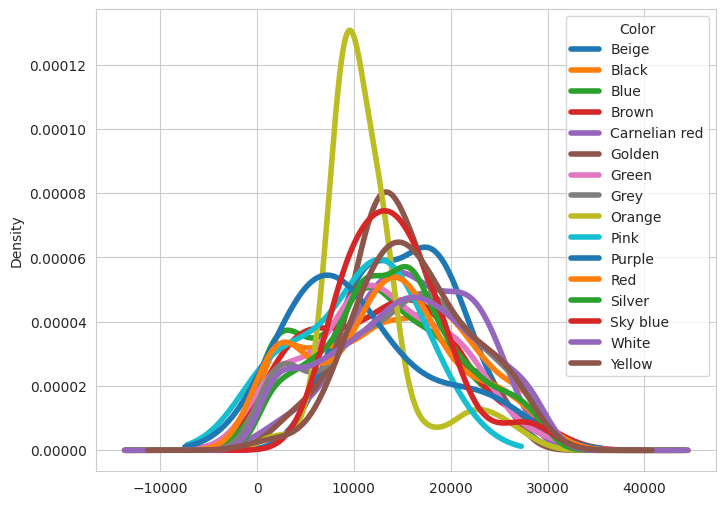

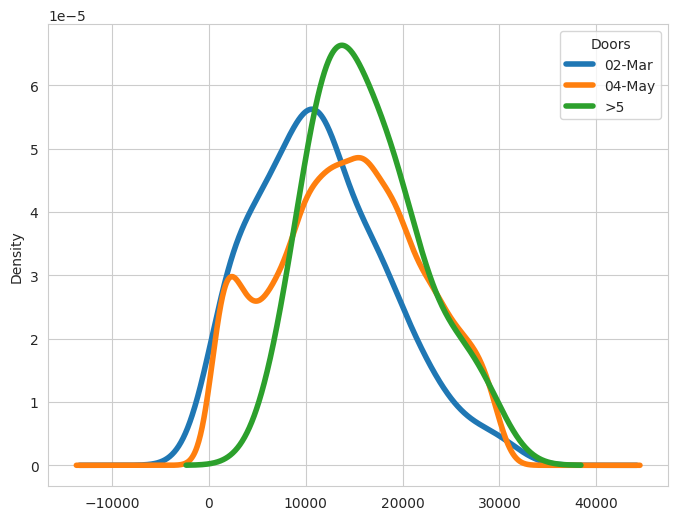

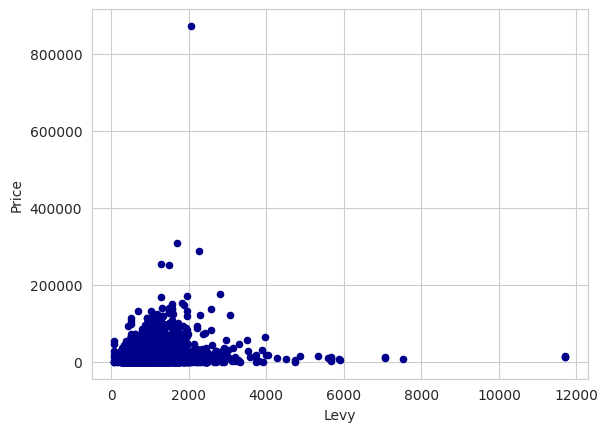

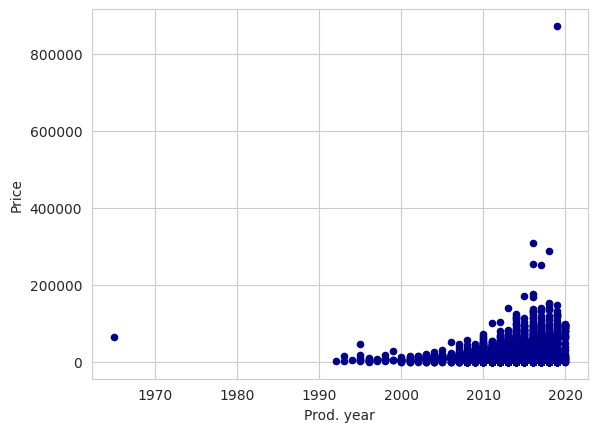

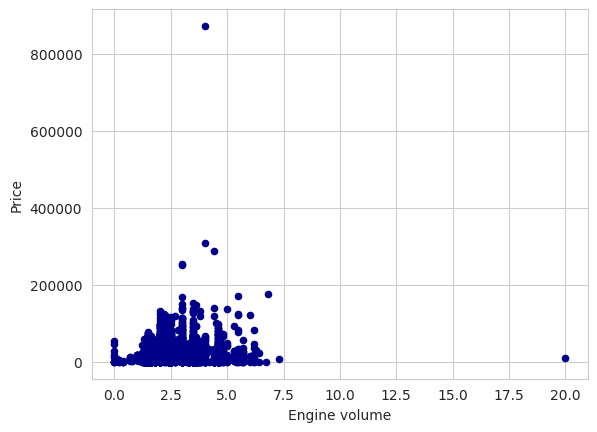

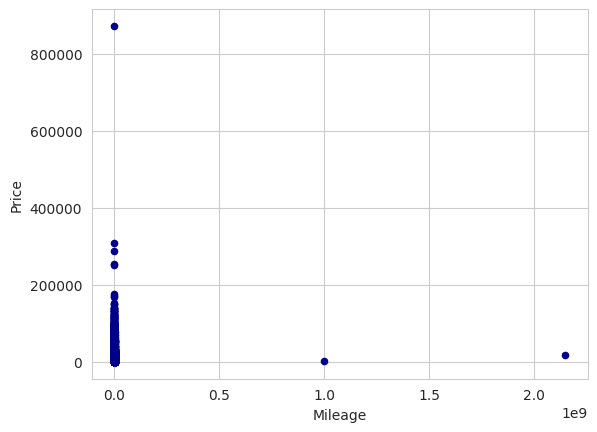

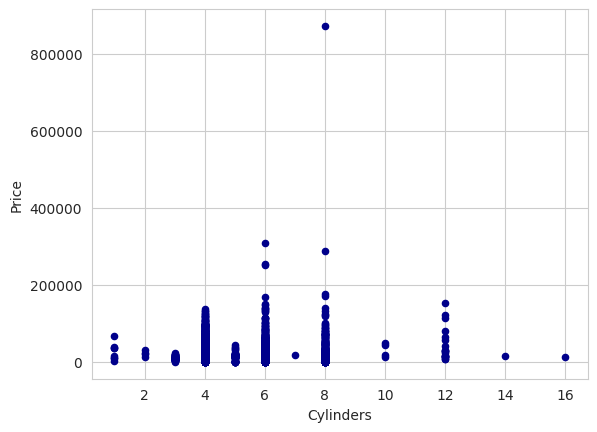

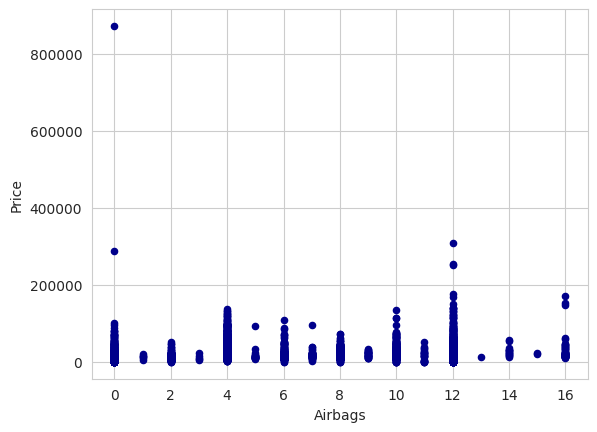

In [22]:

num_columns = ["Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Airbags"]
cat_columns = ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Wheel", "Color", "Doors"]
response_var = "Price"

if(IF_Levy_DELETE == True):
    num_columns.remove("Levy")

df_buff = df_src[(df_src["Price"] > 850) & (df_src["Price"] < 30000)]
for cat_col_i in cat_columns:
    # Что-то не работает с производителями и моделями...
    if(cat_col_i != "Manufacturer" and cat_col_i != "Model"):
        data_wide = df_buff.pivot(columns=cat_col_i, values=response_var)
        # df_buff.pivot делает новую таблицу, где:
        # Категории из cat_col_i становятся столбцами
        # Каждая i строка имеет все NaN, кроме того столбца, где на i-ой строке в df_buff была именна эта категория,
        # и в этом столбце, где не NaN будет стоять цена на i-ой строке в df_buff
        data_wide.plot.kde(figsize = (8, 6), linewidth = 4)
        # kde - это диаграмма плотности

for num_col_i in num_columns:
    df_src.plot.scatter(x=num_col_i, y=response_var, c="DarkBlue")
    

<Figure size 1000x1000 with 0 Axes>

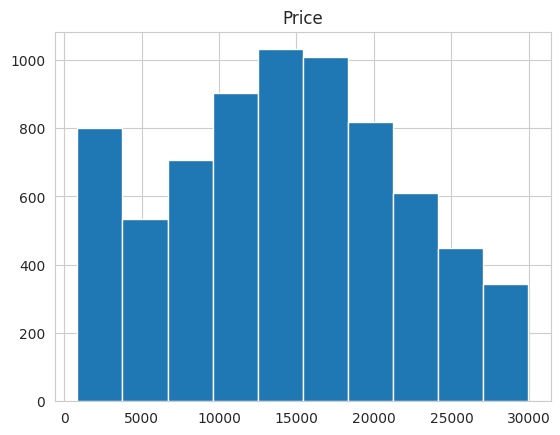

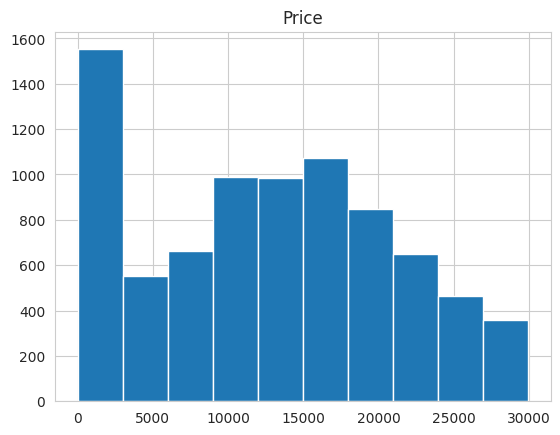

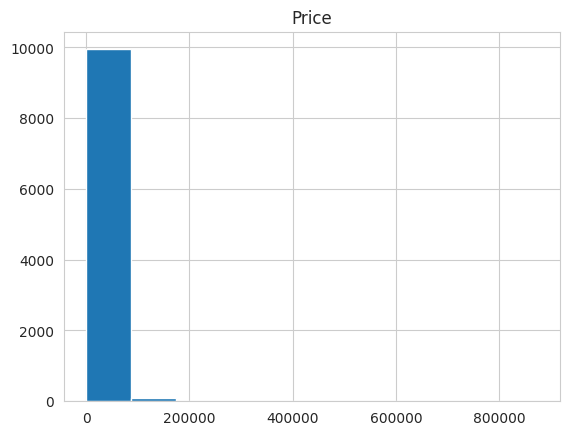

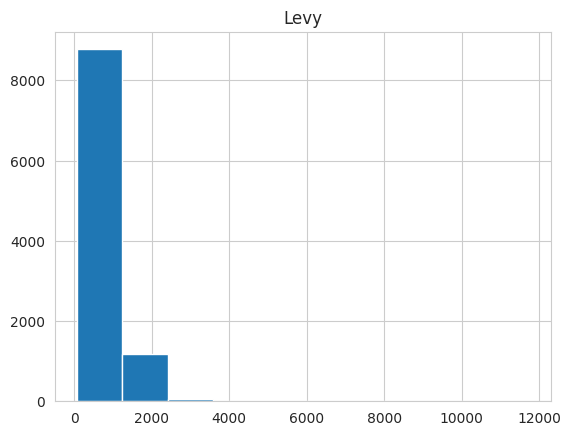

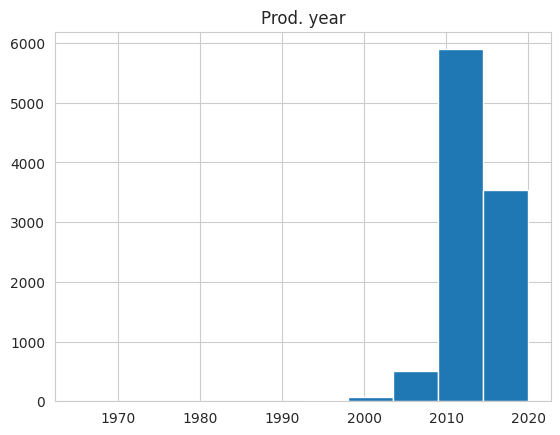

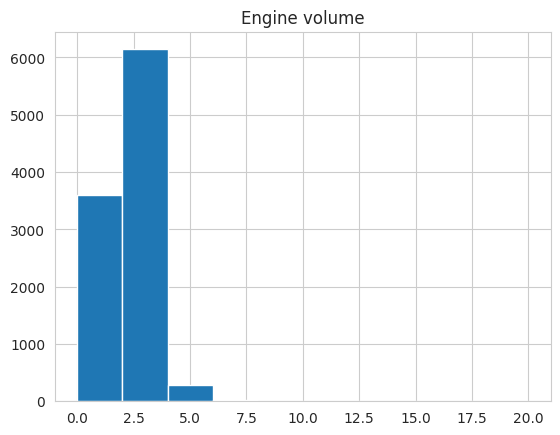

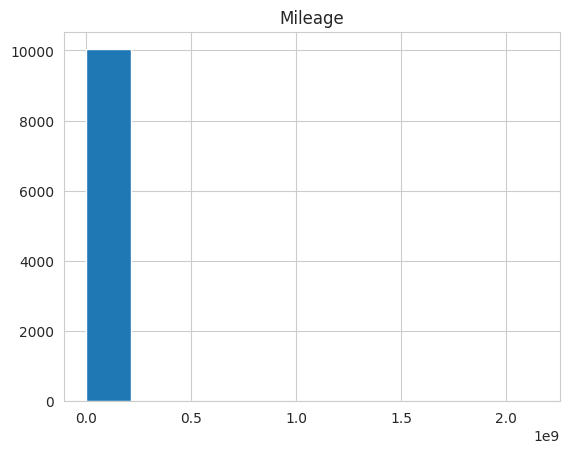

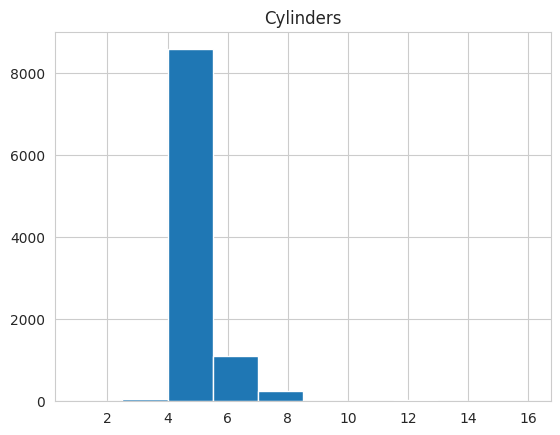

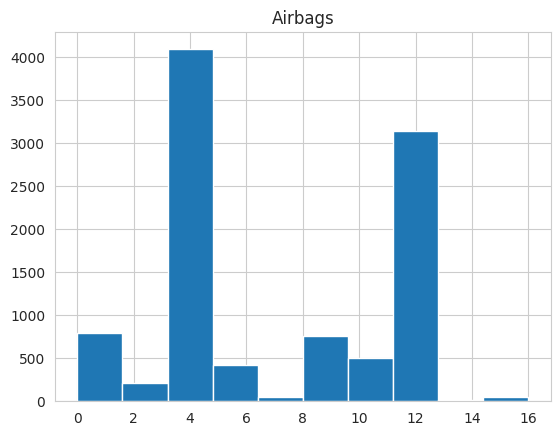

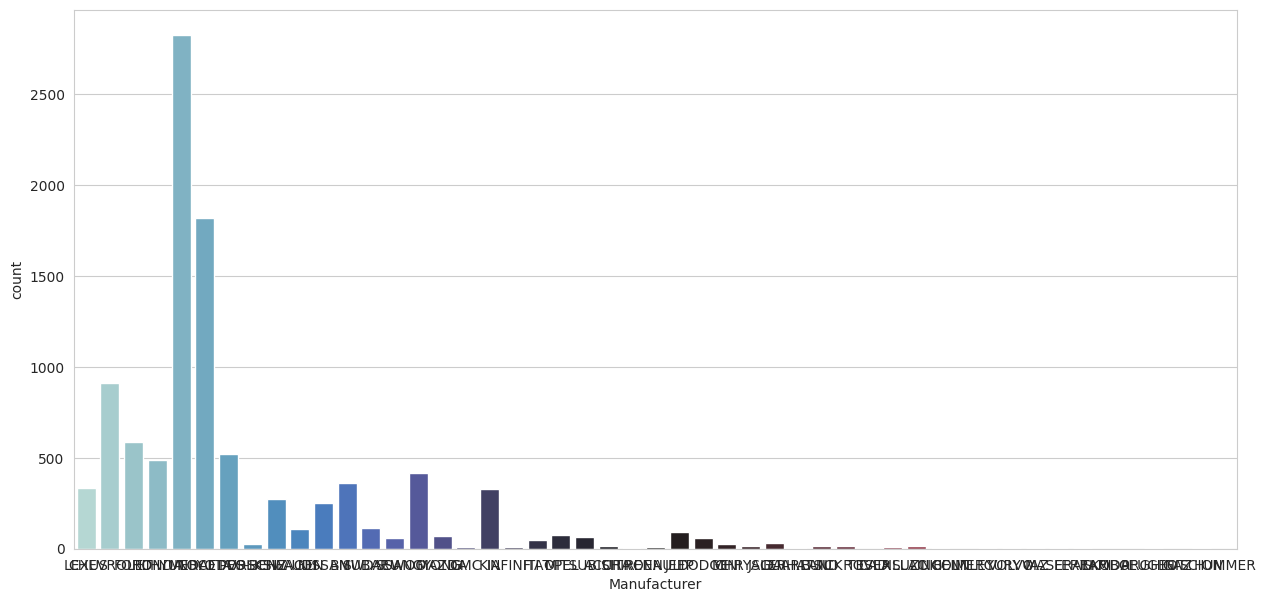

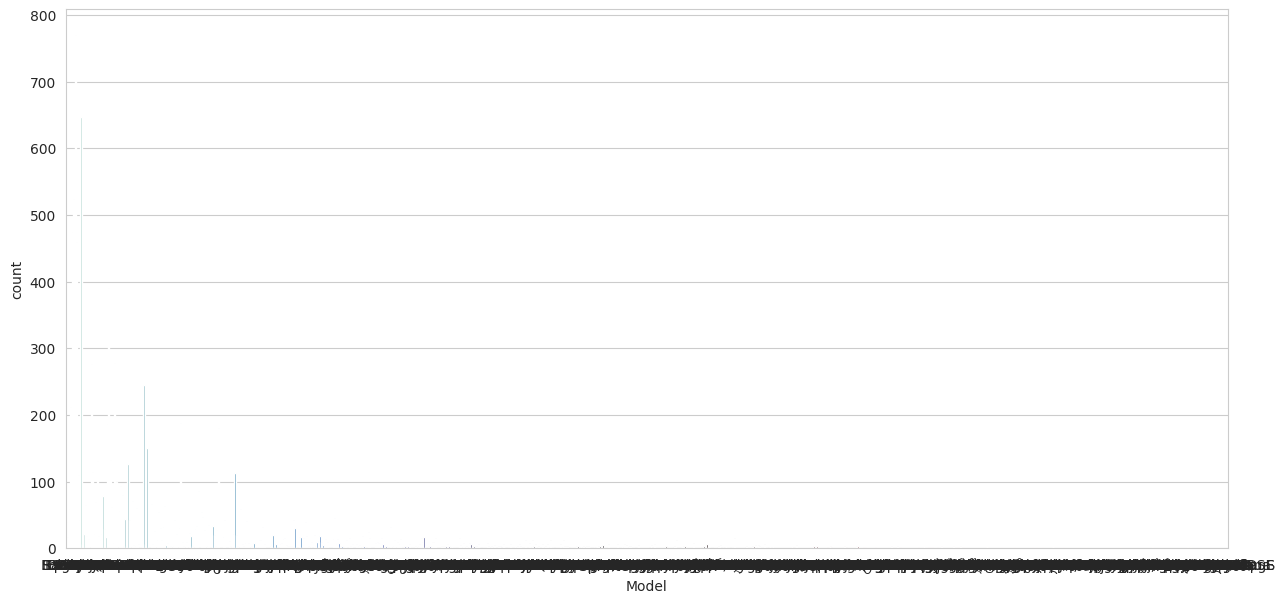

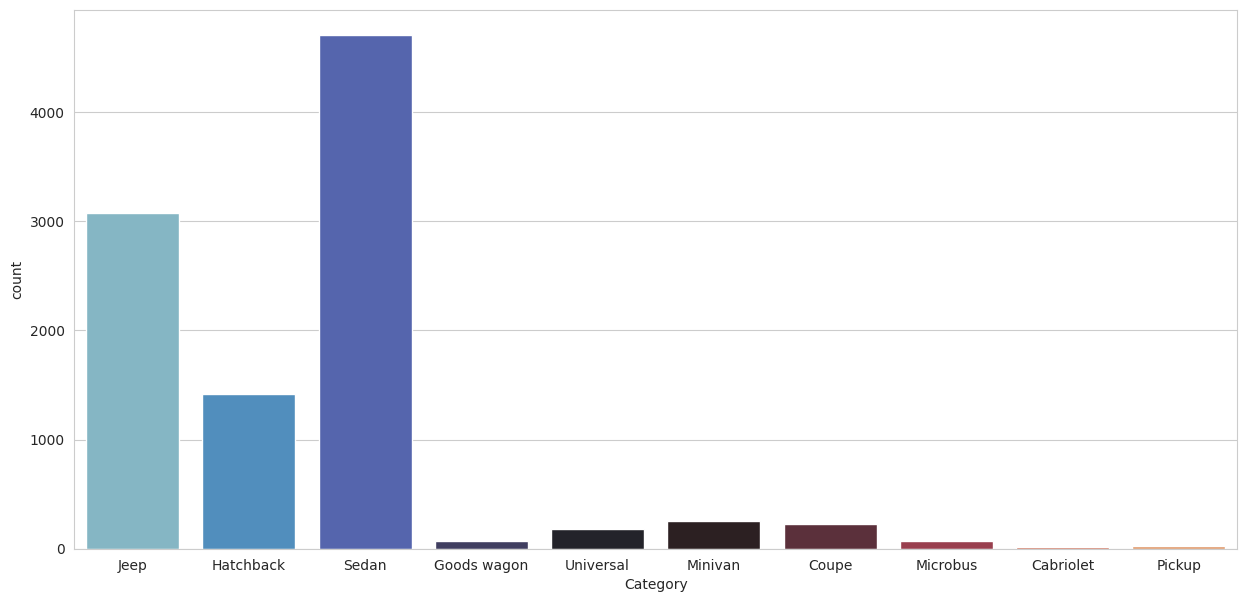

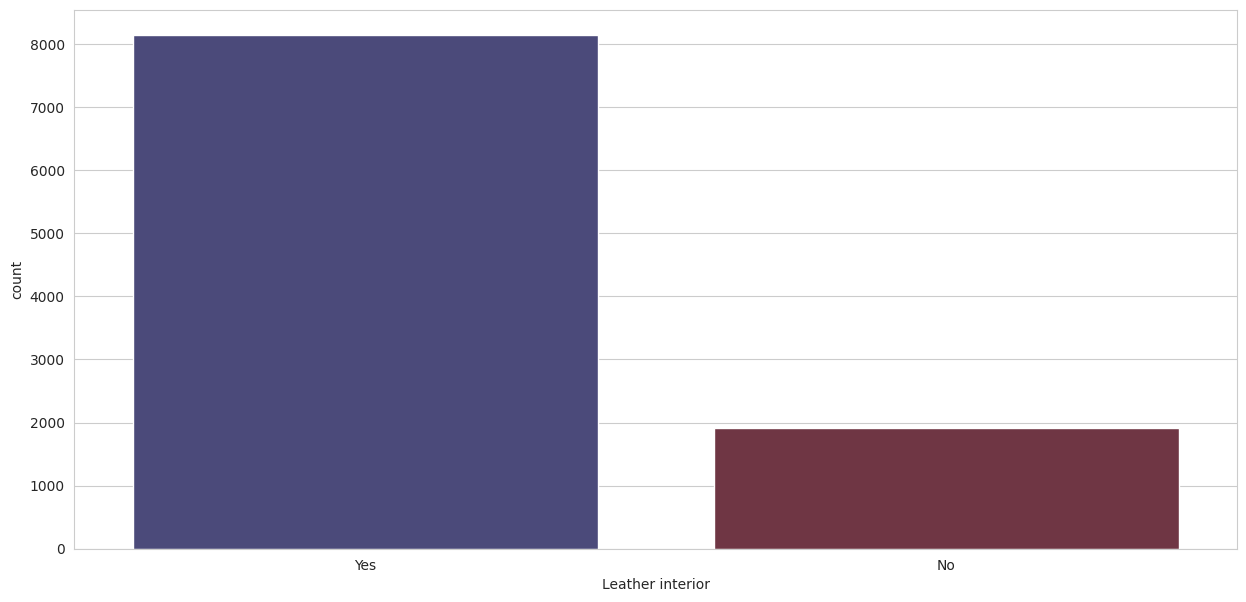

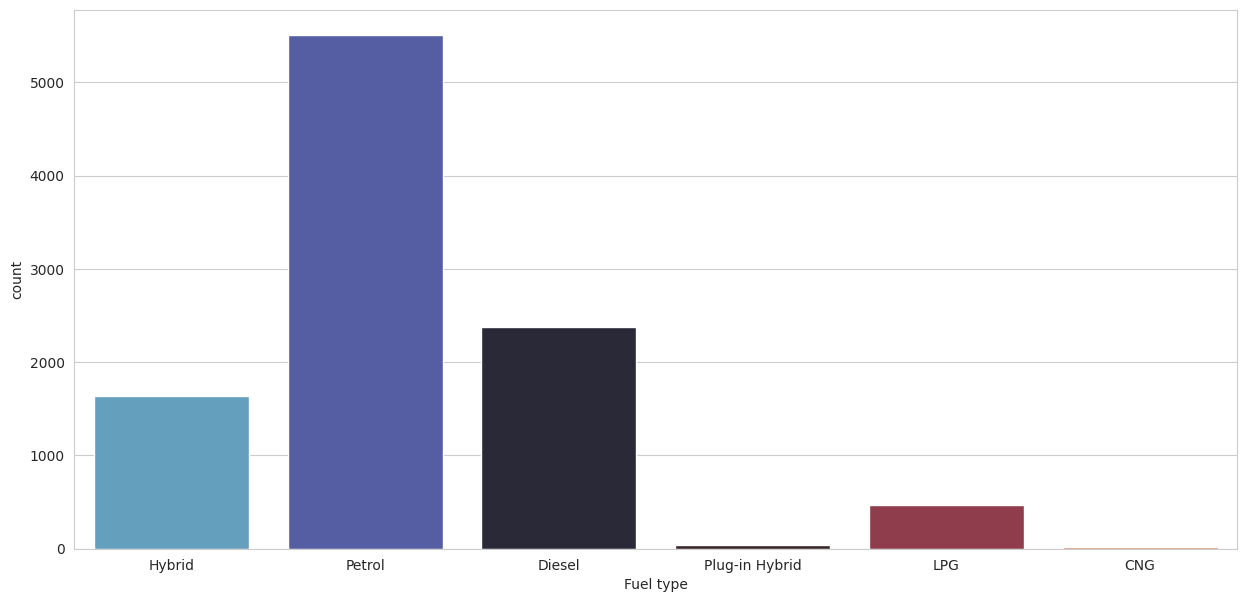

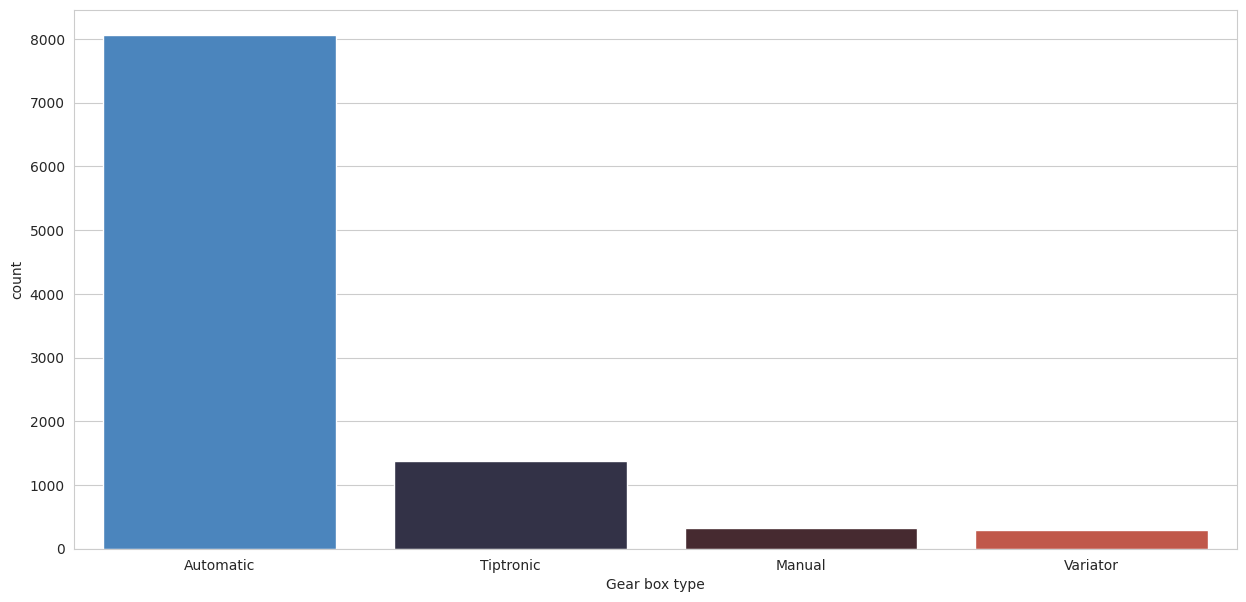

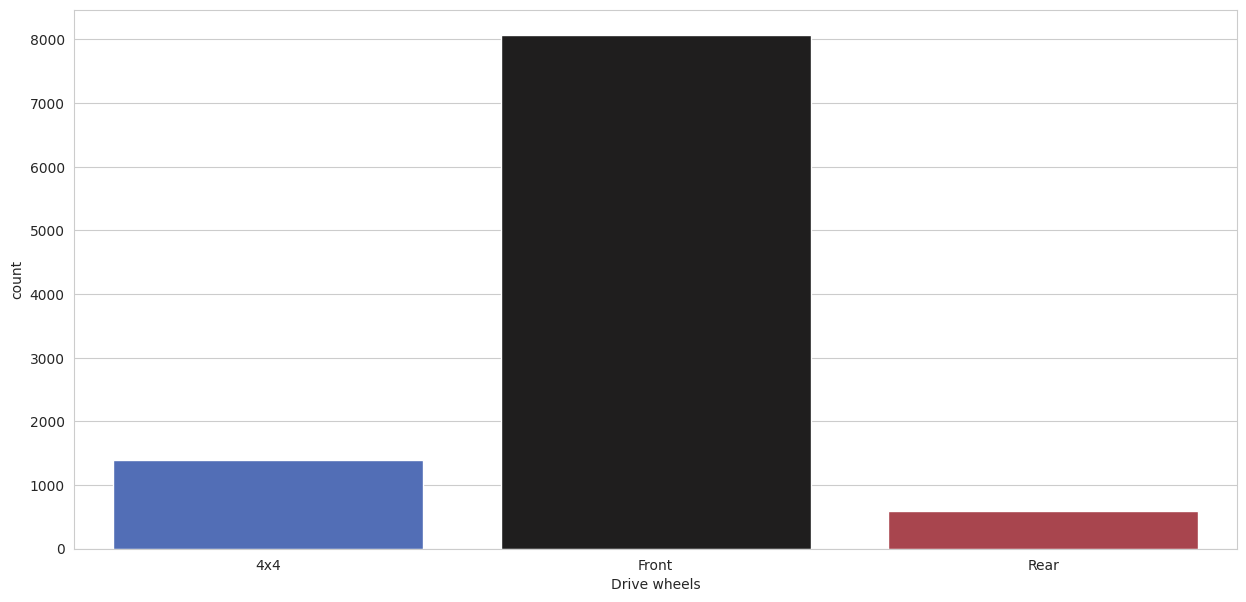

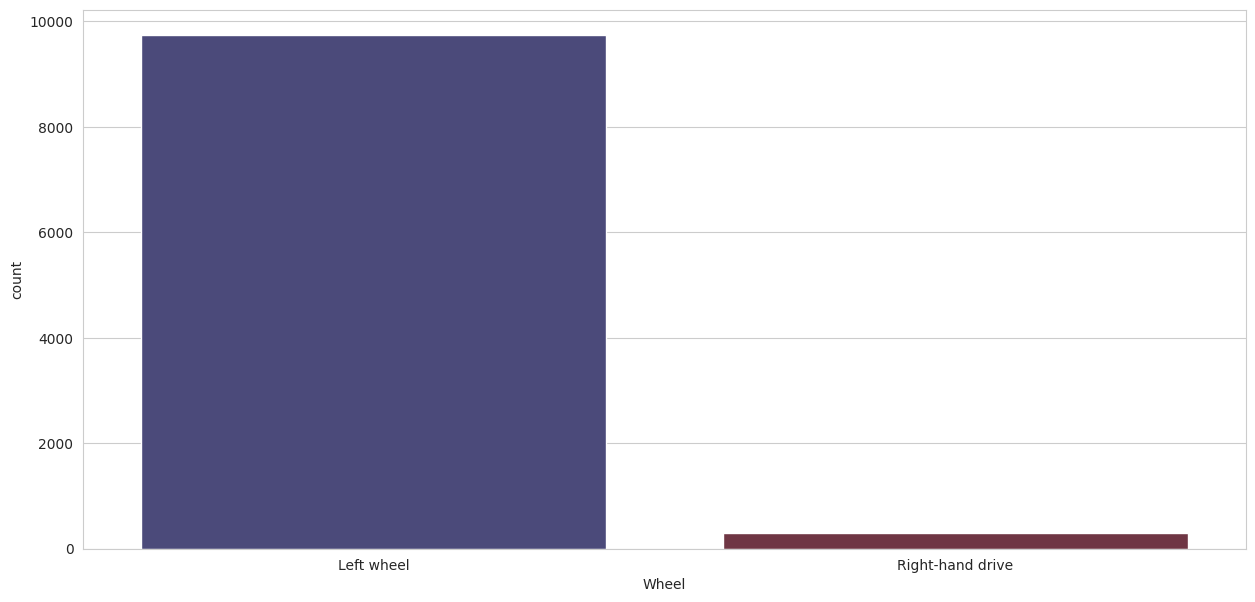

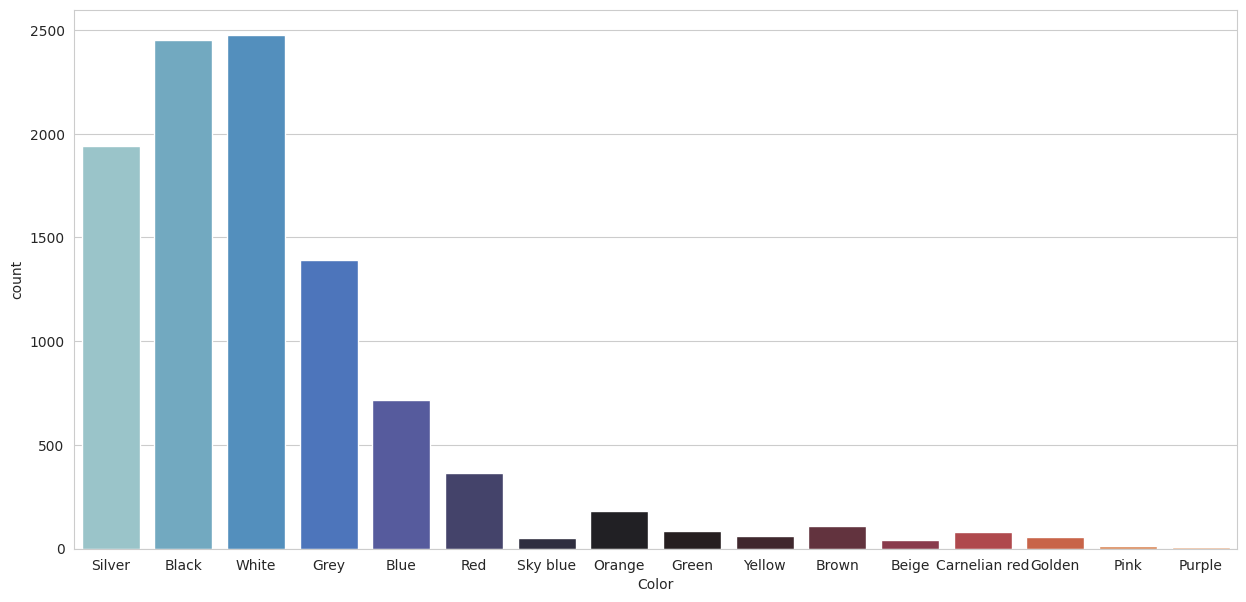

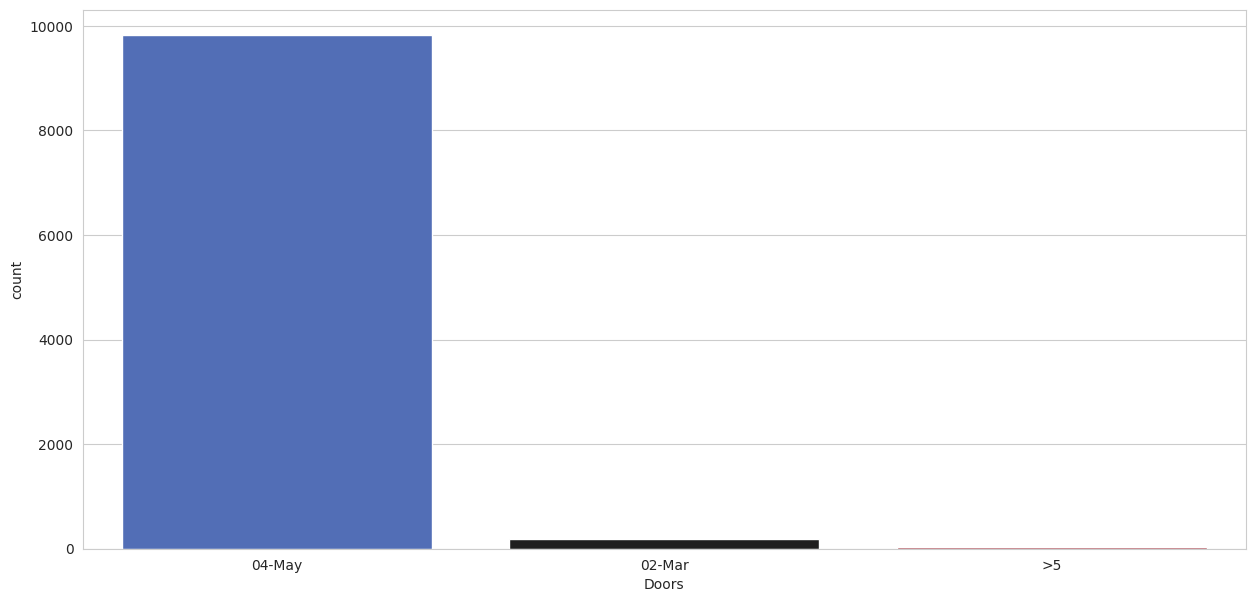

In [23]:
# Гистограммы

num_columns = ["Price", "Levy", "Prod. year", "Engine volume", "Mileage", "Cylinders", "Airbags"]
cat_columns = ["Manufacturer", "Model", "Category", "Leather interior", "Fuel type", "Gear box type", "Drive wheels", "Wheel", "Color", "Doors"]


if(IF_Levy_DELETE == True):
    num_columns.remove("Levy")
    
plt.figure(figsize=(10, 10))

df_src[(df_src["Price"] > 850) & (df_src["Price"] < 30000)].hist(column="Price")
df_src[(df_src["Price"] < 30000)].hist(column="Price")

for col_i in num_columns:
    df_src.hist(column=col_i)
    
for col_i in cat_columns:
    fig,ax=plt.subplots(figsize=(15,7))
    sns.countplot(data=df_src, x=col_i, palette="icefire")
    

# Регрессия

## Оценка результата

![](./imgs/error.png)

### r2_score

![](./imgs/R2_score.png)

### RMSE

![](./imgs/RMSE.png)

### MSE

![](./imgs/MSE.png)

### MAE

![](./imgs/MAE.png)


In [24]:
from sklearn.linear_model import SGDRegressor       # линейная регрессия с градиентным спуском
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RND_STATE = 5051

# X = df_nums.copy()
X = df_nums_scaled.copy()
Y = X["Price"].copy()

X_train, X_test = train_test_split(X, train_size = 0.7, test_size = 0.3, random_state = RND_STATE)

Y_train, Y_test = X_train["Price"].copy(), X_test["Price"].copy()

del X_train["Price"]
del X_test["Price"]
del X["Price"]

regressors = []

In [25]:
def show_error(Y_test, Y_pred, plot_off = False) -> str:
    S = f"r2_score: {r2_score(Y_test, Y_pred)}\n"
    mse = mean_squared_error(Y_test, Y_pred)
    S += f"RMSE: {np.sqrt(mse)}\n"
    S += f"MSE: {mse}\n"
    S += f"MAE: {mean_absolute_error(Y_test, Y_pred)}\n"
    if(plot_off == False):
        fig,ax=plt.subplots(figsize=(10,10))
        sns.scatterplot(x=Y_test,y=Y_pred)
        plt.xlabel('Y_test', fontsize=10)
        plt.ylabel('Y_pred', fontsize=10)
    return S

# Линейная регрессия

In [26]:
# Эту и нижнюю питоновские ячейки можно скипнуть, они опциональны. 

# tol - сообщает модели, когда следует прекратить итерацию
# eta0 - начальная скорость обучения
speeeeeeds = [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3]
for eta0_i in speeeeeeds:
    linear_regression_model = SGDRegressor(tol=0.0001, eta0=eta0_i) 
    linear_regression_model.fit(X, Y)
    predictions = linear_regression_model.predict(X)
    print(f"\nFor eta0={eta0_i}: ") # меньше = лучше
    print(f"{show_error(Y, predictions, True)}")


/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:1527: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(



For eta0=0.001: 
r2_score: 0.24761462683658542
RMSE: 17536.070595140376
MSE: 307513771.91774696
MAE: 10236.256787465252


For eta0=0.003: 
r2_score: 0.2670220649014883
RMSE: 17308.425526682542
MSE: 299581594.21271586
MAE: 10044.794900318087


For eta0=0.01: 
r2_score: 0.284445013405096
RMSE: 17101.476953018155
MSE: 292460513.9746111
MAE: 10084.888265524392


For eta0=0.03: 
r2_score: 0.29315120229298197
RMSE: 16997.12134689946
MSE: 288902134.0812254
MAE: 9974.411151473028


For eta0=0.1: 
r2_score: 0.29839011100606727
RMSE: 16934.015929870948
MSE: 286760895.513123
MAE: 9907.6028406441


For eta0=0.3: 
r2_score: 0.06843116583585884
RMSE: 19512.79978885646
MSE: 380749355.5999967
MAE: 13671.228788544746


For eta0=1: 
r2_score: 0.16146930243147617
RMSE: 18512.77812903034
MSE: 342722954.054704
MAE: 10503.99418339812


For eta0=3: 
r2_score: 0.05608787233741941
RMSE: 19641.646753676214
MSE: 385794287.1961994
MAE: 12027.829817199434



In [27]:
linear_regression_model = SGDRegressor(tol=0.0001, eta0=0.03) 
linear_regression_model.fit(X, Y)

regressors.append(("SGDRegressor", r2_score(Y, linear_regression_model.predict(X))))

sorted(list(zip(X.columns, linear_regression_model.coef_)), 
       key=lambda x: abs(x[1]))

[('Yellow', -408.0525643252035),
 ('Sky blue', 446.6273692899194),
 ('Pickup', -581.8465224819358),
 ('Pink', -903.845451796803),
 ('Leather interior', 947.1401942032995),
 ('Golden', 1088.631387149415),
 ('Jeep', -1211.6772235261744),
 ('Mileage', 1213.6061140126753),
 ('Carnelian red', -1225.9762402214876),
 ('Black', -1367.4395299085788),
 ('Plug-in Hybrid', 1647.6017243015776),
 ('Brown', -1678.8641566509373),
 ('Grey', -1746.6815285763576),
 ('Tiptronic', -1889.691386034937),
 ('White', -1955.0927644903477),
 ('Beige', -1979.014142700648),
 ('Cabriolet', 2507.4917780130595),
 ('Universal', 2604.843446457509),
 ('Coupe', 2643.2802790538667),
 ('Diesel', -2937.601395731598),
 ('Purple', -3486.3052252703983),
 ('Minivan', -3644.088849110992),
 ('Blue', -3702.457843424954),
 ('Silver', -3784.993680722487),
 ('Green', -3995.539488661072),
 ('Red', -4458.8993581659),
 ('CNG', -4699.815290716164),
 ('>5', -6638.319294424795),
 ('Orange', -6743.760601277492),
 ('Hatchback', -7667.36025648

## А если убрать лишние признаки?

Ranks of features: 
[('Levy', True, 1), ('Prod. year', True, 1), ('Leather interior', False, 39), ('Engine volume', True, 1), ('Mileage', True, 1), ('Cylinders', False, 5), ('Wheel', True, 1), ('Airbags', True, 1), ('Cabriolet', False, 7), ('Coupe', False, 4), ('Goods wagon', True, 1), ('Hatchback', False, 27), ('Jeep', False, 15), ('Microbus', False, 2), ('Minivan', False, 32), ('Pickup', False, 38), ('Sedan', False, 11), ('Universal', False, 6), ('CNG', False, 40), ('Diesel', False, 3), ('Hybrid', False, 18), ('LPG', True, 1), ('Petrol', False, 17), ('Plug-in Hybrid', True, 1), ('Beige', False, 26), ('Black', False, 25), ('Blue', False, 34), ('Brown', False, 35), ('Carnelian red', False, 20), ('Golden', False, 13), ('Green', False, 33), ('Grey', False, 23), ('Orange', False, 10), ('Pink', False, 14), ('Purple', False, 12), ('Red', False, 28), ('Silver', False, 36), ('Sky blue', False, 19), ('White', False, 24), ('Yellow', False, 37), ('Automatic', True, 1), ('Manual', False, 41), ('T

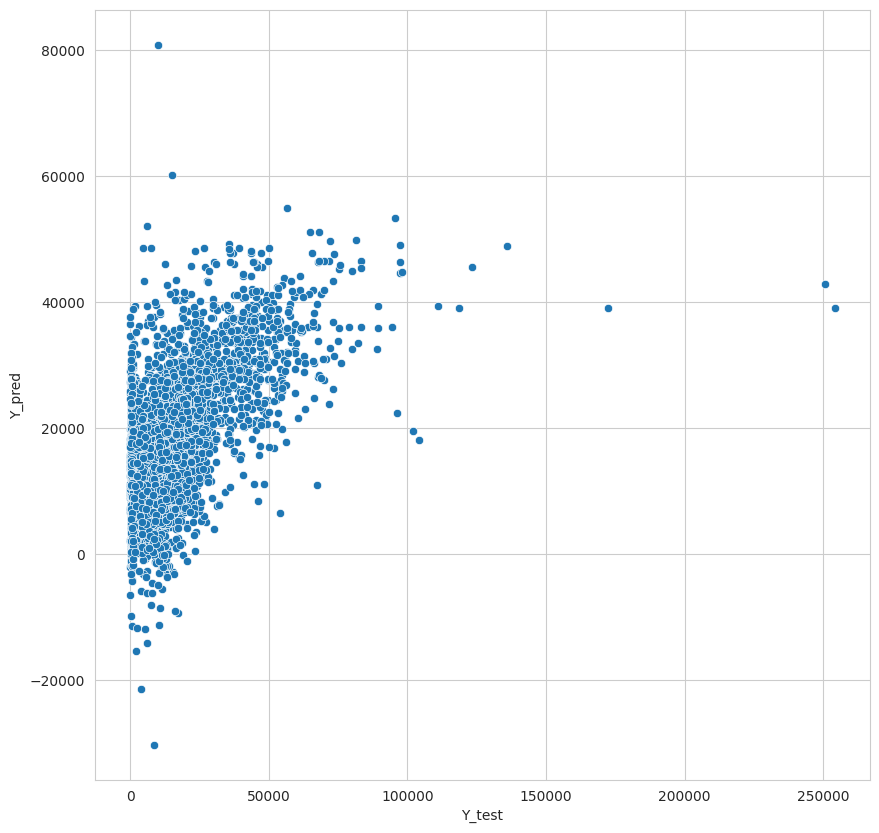

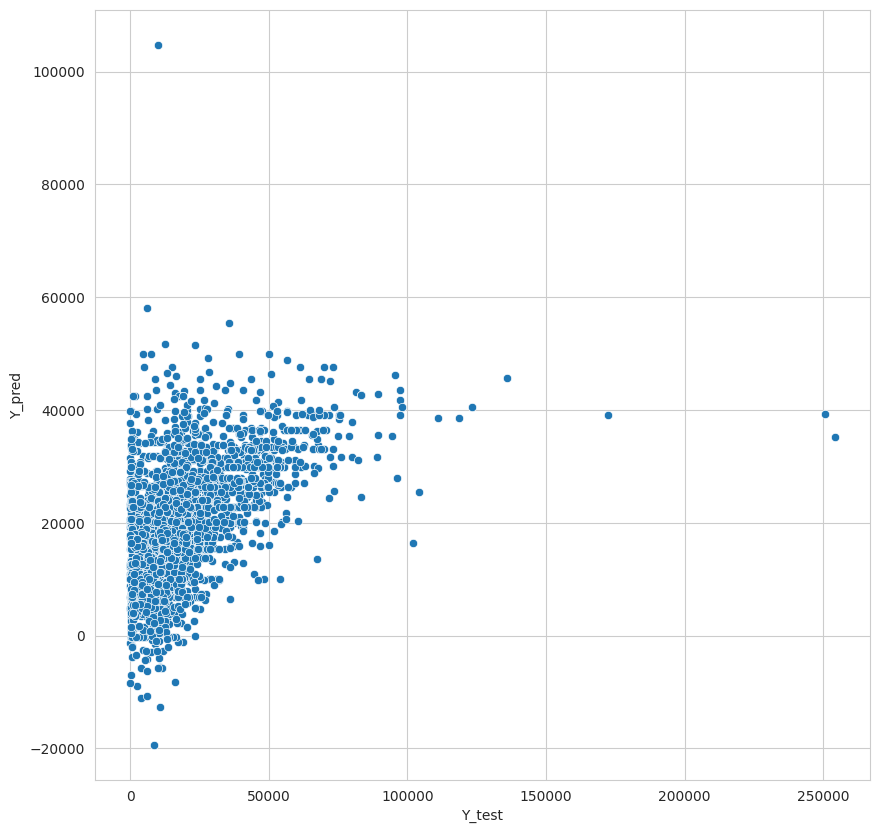

In [28]:
from sklearn.feature_selection import RFE

lm1 = LinearRegression()
lm1.fit(X_train, Y_train)

rfe = RFE(lm1, n_features_to_select=10)
rfe = rfe.fit(X_train, Y_train)

print(f"Ranks of features: \n{list(zip(X_train.columns,rfe.support_,rfe.ranking_))}")
print(f"Top 10 the most impact features: {X_train.columns[rfe.support_]}")

X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_test_rfe = X_test[X_test.columns[rfe.support_]]
lm2 = LinearRegression()
lm2.fit(X_train_rfe, Y_train)

Y_pred = lm1.predict(X_test)
Y_pred_rfe = lm2.predict(X_test_rfe)

print(f"\n For not rfe prediction: ")
print(show_error(Y_test, Y_pred))

print(f"\n For rfe prediction: ")
print(show_error(Y_test, Y_pred_rfe))

regressors.append(("LinearRegression", r2_score(Y_test, Y_pred)))
regressors.append(("LinearRegression_rfe", r2_score(Y_test, Y_pred)))


# Дерево решений

Выбираем ~~рандомно~~ вопросы для разделения выборки на левую и правую часть. И для каждого вопроса:

1. Считаем среднее значение `f` параметра, который предсказывается, у всех элементов, которые попали налево.

2. Теперь находим MSE: квадрат разницы `f` и значения, которое предсказывается, у всех элементов слева; и всё это делится на количество элементов слева.

3. Делаем пункты 1 и 2 для тех, кто попал направо.

4. Считаем прирост информации:

![](./imgs/Decision_Tree_Regressor.png)

После досчёта прироста информации для каждого разделяющего вопроса выбираем тот вопрос, у которого прирост информации максимален.

Переходим далее делить правую или левую подвыборку. И так пока не выполнится условия останова:

- В каждом листе останется только 1 объект (переобучение гарантировано).

- Глубина стала больше `max_depth`.

- Количество листьев с минимальным количеством в нём объектов `min_samples_leaf` стало больше, чем `max_leaf_nodes`. 

...

r2_score: 0.5500270370890272
RMSE: 12031.956503379111
MSE: 144767977.2992069
MAE: 6763.79587319331



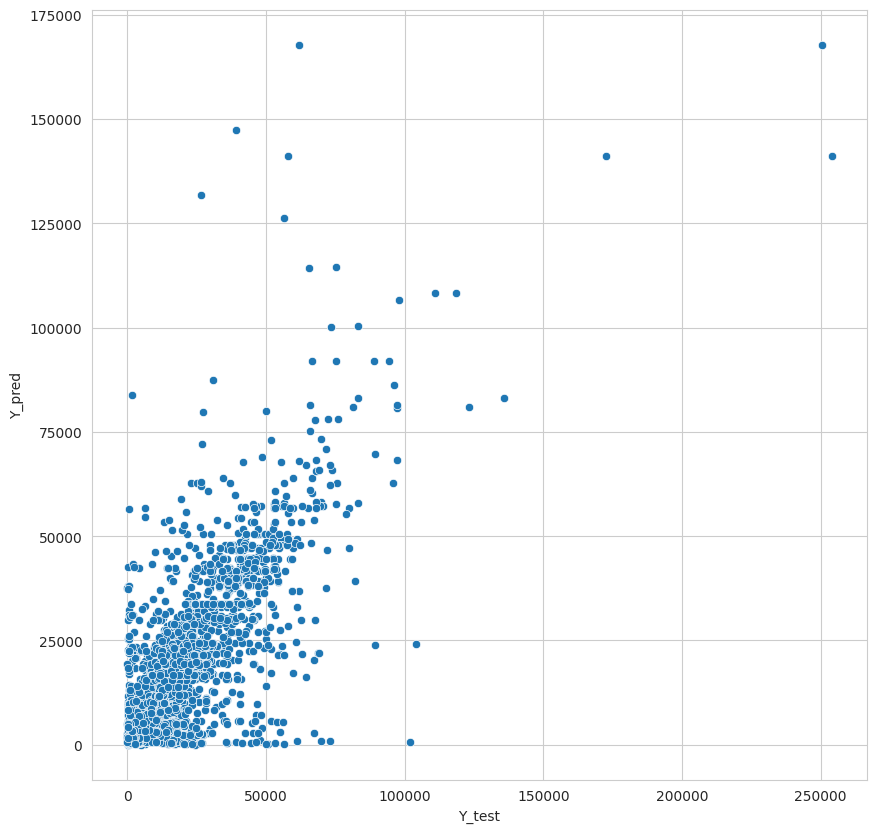

In [29]:
dt = DecisionTreeRegressor(max_depth = 15, random_state = RND_STATE+12)
dt.fit(X_train, Y_train)
Y_pred = dt.predict(X_test)

print(show_error(Y_test, Y_pred))
regressors.append(("DecisionTreeRegressor", r2_score(Y_test, Y_pred)))

# LASSO - L1-регуляризация

- Штраф — это сумма квадратов коэффициентов переменных. 

![](./imgs/LASSO.png)

/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.853e+11, tolerance: 3.135e+08
  model = cd_fast.enet_coordinate_descent(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.854e+11, tolerance: 3.135e+08
  model = cd_fast.enet_coordinate_descent(
/run/media/the220th/archBTW/home/the220th/git/etu2022_AI_ML_NN/new_env_folder/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceW

Highest r2 = 0.34701850774232657 with alpha (lambda) = 20.3


Text(0, 0.5, '$r2 score$')

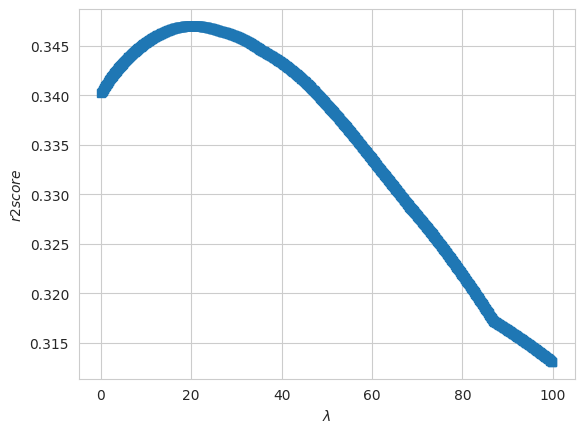

In [30]:
Ys = []
Xs = []
for i in range(1, 1000):
    l_alpha = i*10 / 100
    model = Lasso(alpha = l_alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    Xs.append(l_alpha)
    Ys.append(r2)

r2_max = max(Ys)
r2_max_i = Ys.index(r2_max)
print(f"Highest r2 = {r2_max} with alpha (lambda) = {Xs[r2_max_i]}")

plt.plot(Xs, Ys, marker="s")
plt.xlabel("$λ$")
plt.ylabel("$r2 score$")

r2_score: 0.34701850774232657
RMSE: 14494.174295523326
MSE: 210081088.5090091
MAE: 9711.486426549385



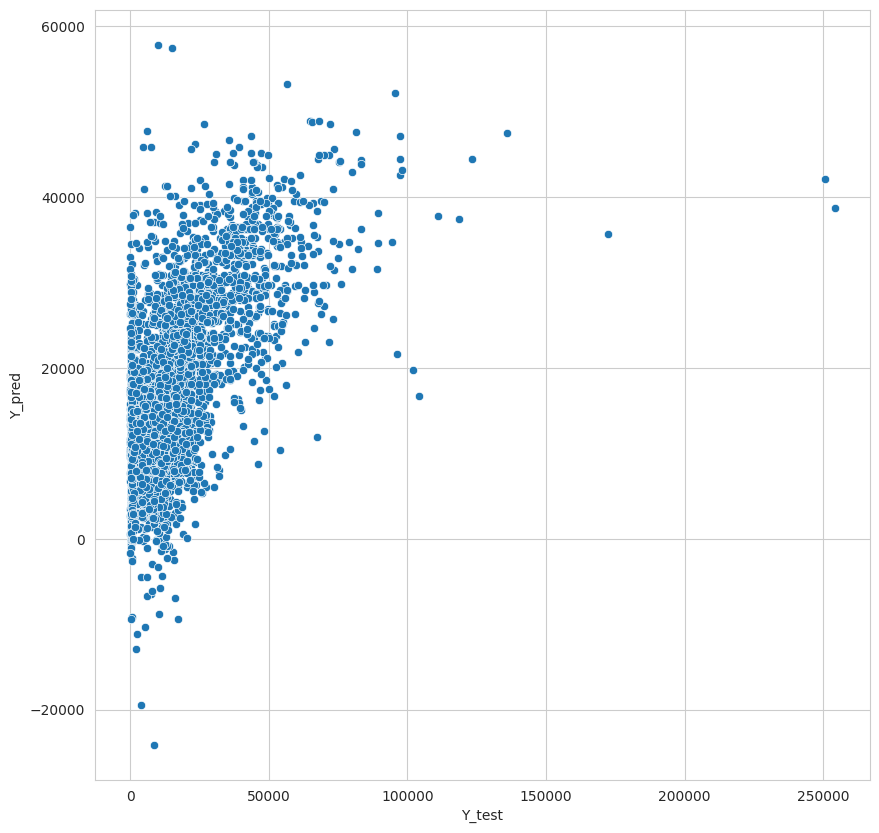

In [31]:
# alpha (lambda) = 20.3 is OK
l1r = Lasso(alpha = 20.3)
l1r.fit(X_train, Y_train)
Y_pred = l1r.predict(X_test)

regressors.append(("Lasso", r2_score(Y_test, Y_pred)))

print(show_error(Y_test, Y_pred))

# Ридж-регрессия - L2-регуляризация

Гребневая регрессия или ridge regression или ридж-регрессия.

- Штраф за признаки с большим значением коэффициентов.

![](./imgs/RIDGE.png)

Highest r2 = 0.3418166105653915 with alpha (lambda) = 1.43


Text(0, 0.5, '$r2 score$')

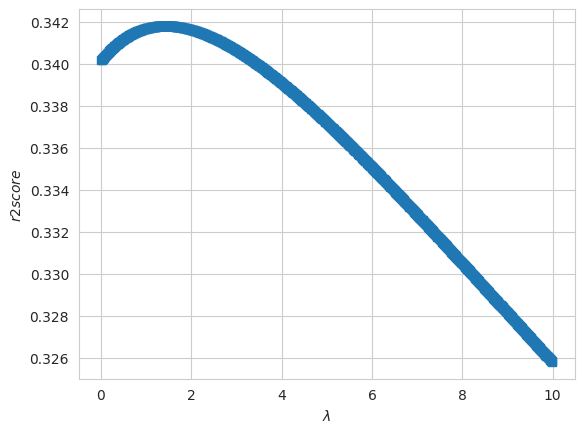

In [32]:
Ys = []
Xs = []
for i in range(1, 1000):
    l_alpha = i*1 / 100
    model = Ridge(alpha = l_alpha)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    r2 = r2_score(Y_test, Y_pred)
    Xs.append(l_alpha)
    Ys.append(r2)

r2_max = max(Ys)
r2_max_i = Ys.index(r2_max)
print(f"Highest r2 = {r2_max} with alpha (lambda) = {Xs[r2_max_i]}")

plt.plot(Xs, Ys, marker="s")
plt.xlabel("$λ$")
plt.ylabel("$r2 score$")

r2_score: 0.3418166105653915
RMSE: 14551.792803664508
MSE: 211754673.80078214
MAE: 9746.670963987373



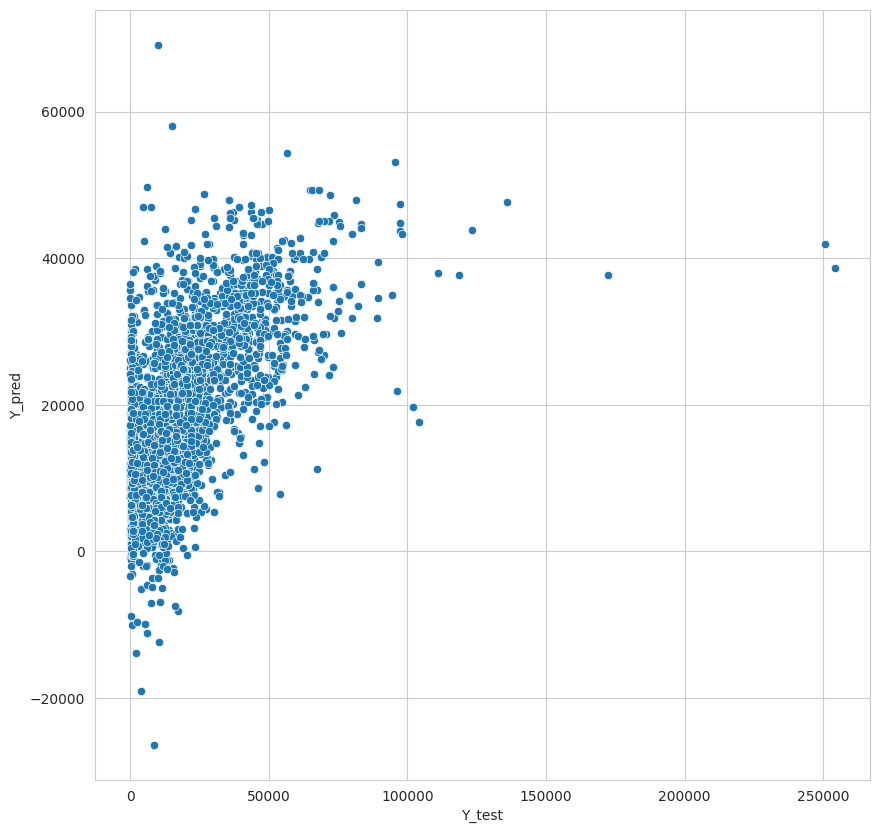

In [33]:
# alpha (lambda) = 1.43 is OK
l2r = Ridge(alpha = 1.43)
l2r.fit(X_train, Y_train)
Y_pred = l2r.predict(X_test)

regressors.append(("Ridge", r2_score(Y_test, Y_pred)))

print(show_error(Y_test, Y_pred))

# XGBoost

[0]	validation_0-rmse:20503.36171
[1]	validation_0-rmse:16805.31164
[2]	validation_0-rmse:14495.96828
[3]	validation_0-rmse:13184.91375
[4]	validation_0-rmse:12319.32425
[5]	validation_0-rmse:11911.32145
[6]	validation_0-rmse:11673.47446
[7]	validation_0-rmse:11422.43310
[8]	validation_0-rmse:11375.27593
[9]	validation_0-rmse:11379.96016
[10]	validation_0-rmse:11345.12474
[11]	validation_0-rmse:11316.34372
[12]	validation_0-rmse:11316.98900
[13]	validation_0-rmse:11318.75736
[14]	validation_0-rmse:11225.66946
[15]	validation_0-rmse:11194.43553
[16]	validation_0-rmse:11183.57364
[17]	validation_0-rmse:11205.24489
[18]	validation_0-rmse:11145.85208
[19]	validation_0-rmse:11147.71155
[20]	validation_0-rmse:11173.23034
[21]	validation_0-rmse:11180.12885
[22]	validation_0-rmse:11170.31253
[23]	validation_0-rmse:11146.71283
r2_score: 0.613863857363304
RMSE: 11145.851958826253
MSE: 124230015.88807105
MAE: 6338.665108246143



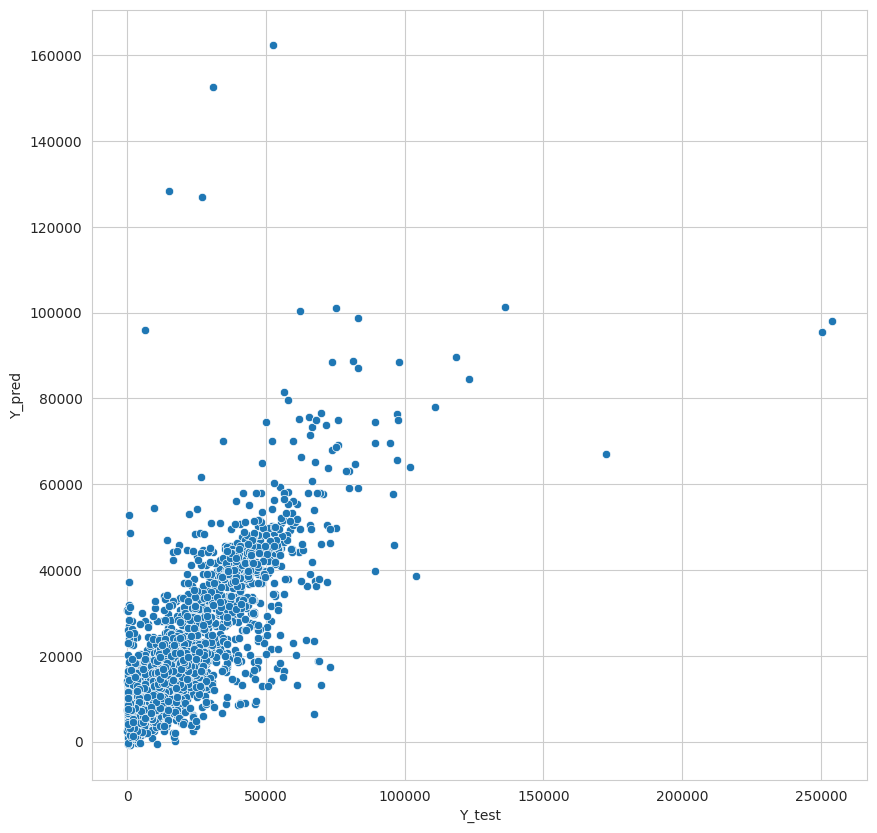

In [34]:

XGBReg = XGBRegressor(n_estimators = 750, early_stopping_rounds = 5,
                                             eval_metric = "rmse")
XGBReg.fit(X_train, Y_train, 
               eval_set=[(X_test, Y_test)], verbose = True)
Y_pred = XGBReg.predict(X_test)

regressors.append(("XGBRegressor", r2_score(Y_test, Y_pred)))

print(show_error(Y_test, Y_pred))

# ElasticNet - L1+L2-регуляризация

- Штраф учитывающий и L1, и L2.

![](./imgs/ElasticNet.png)

Highest r2 = 0.25362040214079173 with alpha (lambda_1) = 0.01 and beta (lambda_2) = 0.01


Text(0.5, 0, '$r2 score$')

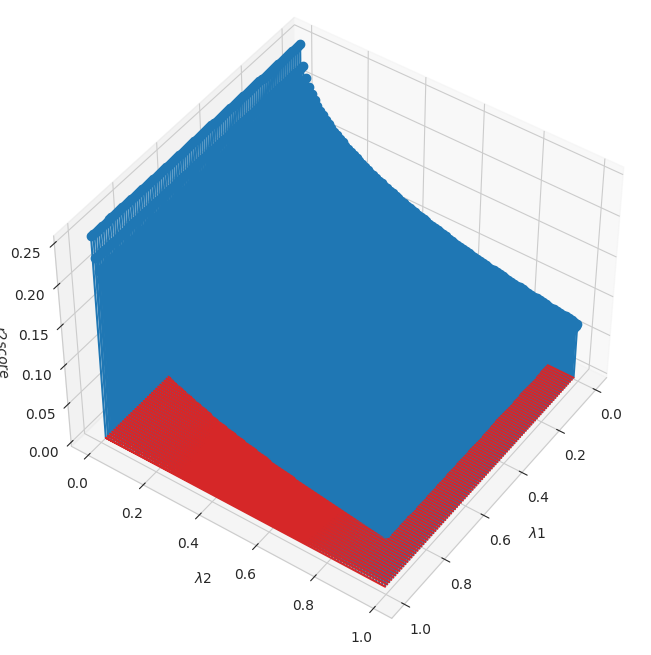

In [41]:
Ys = []
Xs_a = []
Xs_b = []
for i in range(1, 100):
    l_alpha = i / 100
    for j in range(1, 100):
        l_beta = j / 100
        model = ElasticNet(alpha = l_alpha+l_beta,
                           l1_ratio = l_alpha/(l_alpha+l_beta))
        model.fit(X_train, Y_train)
        Y_pred = model.predict(X_test)
        r2 = r2_score(Y_test, Y_pred)
        Xs_a.append(l_alpha)
        Xs_b.append(l_beta)
        Ys.append(r2)

r2_max = max(Ys)
r2_max_i = Ys.index(r2_max)
print(f"Highest r2 = {r2_max} with alpha (lambda_1) = {Xs_a[r2_max_i]} and beta (lambda_2) = {Xs_b[r2_max_i]}")

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.stem(Xs_a, Xs_b, Ys)
ax.view_init(45, 35)
ax.set_xlabel("$λ1$")
ax.set_ylabel("$λ2$")
ax.set_zlabel("$r2 score$")


r2_score: 0.25362040214079173
RMSE: 15496.118301552855
MSE: 240129682.41572136
MAE: 10484.10071292979



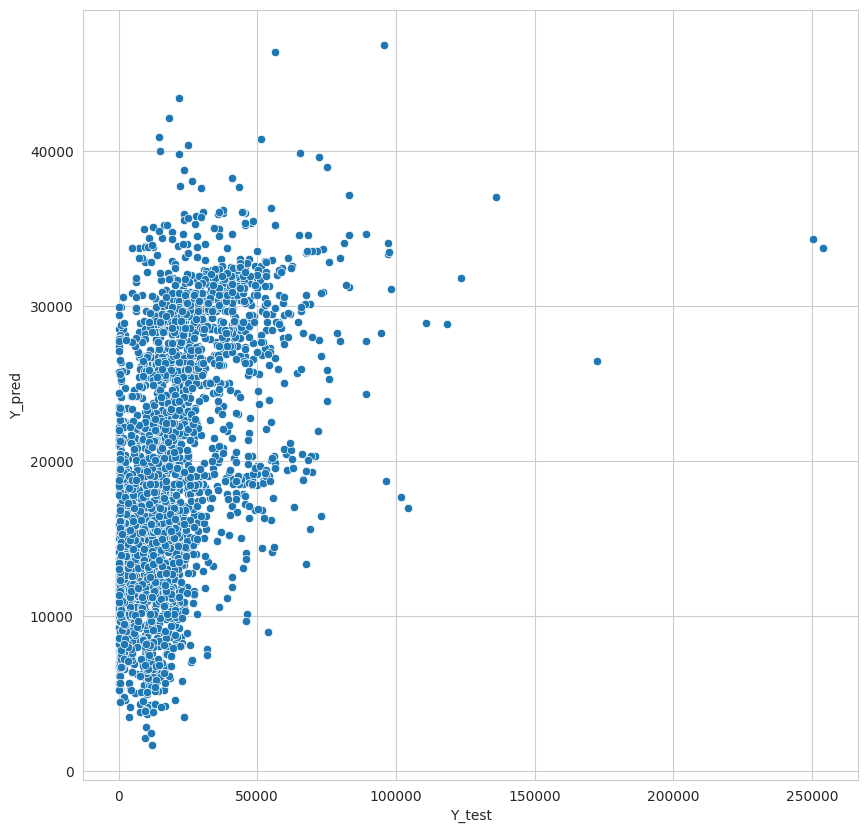

In [36]:
# alpha (lambda_1) = 0.01 is OK
# beta (lambda_2) = 0.01 is OK
elastica = ElasticNet(alpha = 0.01+0.01,
                  l1_ratio = 0.01/(0.01+0.01))
elastica.fit(X_train, Y_train)
Y_pred = elastica.predict(X_test)

regressors.append(("ElasticNet", r2_score(Y_test, Y_pred)))

print(show_error(Y_test, Y_pred))

# Сравнение

SGDRegressor: 29%
LinearRegression: 34%
LinearRegression_rfe: 34%
DecisionTreeRegressor: 55%
Lasso: 35%
Ridge: 34%
XGBRegressor: 61%
ElasticNet: 25%


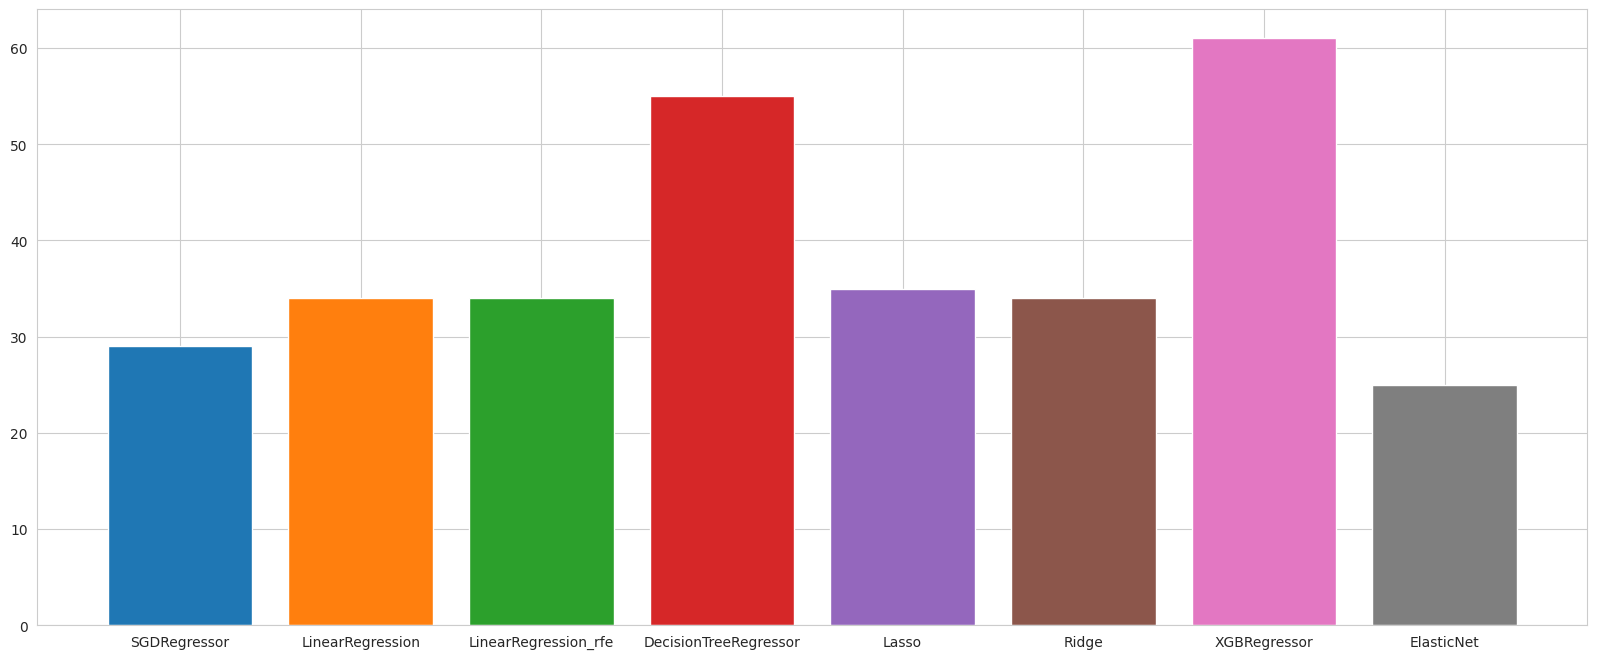

In [40]:
for regressor_name, regressor_r2_score in regressors:

    accuracy = round(regressor_r2_score*100)
    
    print(f"{regressor_name}: {accuracy}%")
    plt.rcParams["figure.figsize"] = (20,8)
    plt.bar(regressor_name, accuracy)